In [14]:

# Init
# choropleth
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:

# df_2009 = pd.read_csv('./acs_transportation_data/2009-5yr-transport.csv', na_values=".", skiprows=[0])
df_2009 = pd.read_csv('./acs_transportation_data/mmsa-2009-5yr-transport.csv', na_values=".", skiprows=[0])
df_2014 = pd.read_csv('./acs_transportation_data/mmsa-2014-5yr-transport.csv', na_values=".", skiprows=[0])
df_2019 = pd.read_csv('./acs_transportation_data/mmsa-2019-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2014 = pd.read_csv('./acs_transportation_data/2014-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2019 = pd.read_csv('./acs_transportation_data/2019-5yr-transport.csv', na_values=".", skiprows=[0])

In [16]:
# 2009 Data Cleanup
# 2009 data does not have bus specific data and combines misc and walking

# ACS09_5yr_B01001001 - total_population
df_2009['09_total_population'] = df_2009['ACS09_5yr_B01001001']
df_2009['09_log_total_population'] = np.log(df_2009['09_total_population'])
df_2009['09_population_density'] = df_2009['ACS09_5yr_B01001001'] / df_2009['Geo_AREALAND']

# Workers 16 Years and Over in Households,ACS09_5yr_B08014001
df_2009['09_total_workers'] = df_2009['ACS09_5yr_B08014001']

df_2009['09_land_area'] = df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS09_5yr_B08015001
df_2009['09_aggregate_num_vehicles'] = df_2009['ACS09_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS09_5yr_C08136001
df_2009['09_aggregate_time_commute'] = df_2009['ACS09_5yr_C08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",ACS09_5yr_C08136002
df_2009['09_aggregate_time_commute_drive_alone'] = df_2009['ACS09_5yr_C08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",ACS09_5yr_C08136003
df_2009['09_aggregate_time_commute_carpool'] = df_2009['ACS09_5yr_C08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),ACS09_5yr_C08136004
df_2009['09_aggregate_time_commute_public_transit'] = df_2009['ACS09_5yr_C08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",ACS09_5yr_C08136005
df_2009['09_aggregate_time_commute_other_means'] = df_2009['ACS09_5yr_C08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS09_5yr_C08134011
df_2009['09_total_workers_drove_alone'] = df_2009['ACS09_5yr_C08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS09_5yr_C08134021
df_2009['09_total_workers_carpooled'] = df_2009['ACS09_5yr_C08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS09_5yr_C08134031
df_2009['09_total_workers_public_transit'] = df_2009['ACS09_5yr_C08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS09_5yr_C08134041
df_2009['09_total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']


# Workers 16 Years and Over Who Did Not Work At Home,ACS09_5yr_C08134001
df_2009['09_ttl_wrkr_cmute'] = df_2009['ACS09_5yr_C08134001']

# Car Truck Or Van - Drove Alone.13,ACS09_5yr_B08122005
df_2009['09_wrkrs_drove_alone'] = df_2009['ACS09_5yr_B08122005']
# Car Truck Or Van - Drove Alone: Below 100 Percent Of The Poverty Level,ACS09_5yr_B08122006
df_2009['09_wrkrs_drove_alone_below_100_poverty'] = df_2009['ACS09_5yr_B08122006']
df_2009['09_pct_wrkrs_drove_alone_below_100_poverty'] = df_2009['ACS09_5yr_B08122006'] / df_2009['09_ttl_wrkr_cmute']
# Car Truck Or Van - Drove Alone: 100 To 149 Percent Of The Poverty Level,ACS09_5yr_B08122007
df_2009['09_wrkrs_drove_alone_100_to_150_poverty'] = df_2009['ACS09_5yr_B08122007']
# Car Truck Or Van - Drove Alone: At Or Above 150 Percent Of The Poverty Level,ACS09_5yr_B08122008
df_2009['09_wrkrs_drove_alone_over_150_poverty'] = df_2009['ACS09_5yr_B08122008']

# Car Truck Or Van - Carpooled.13,ACS09_5yr_B08122009
df_2009['09_wrkrs_carpool'] = df_2009['ACS09_5yr_B08122009']
# Car Truck Or Van - Carpooled: Below 100 Percent Of The Poverty Level,ACS09_5yr_B08122010
df_2009['09_wrkrs_carpool_below_100_poverty'] = df_2009['ACS09_5yr_B08122010']
df_2009['09_pct_wrkrs_carpool_below_100_poverty'] = df_2009['ACS09_5yr_B08122010'] / df_2009['09_ttl_wrkr_cmute']
# Car Truck Or Van - Carpooled: 100 To 149 Percent Of The Poverty Level,ACS09_5yr_B08122011
df_2009['09_wrkrs_carpool_100_to_150_poverty'] = df_2009['ACS09_5yr_B08122011']
# Car Truck Or Van - Carpooled: At Or Above 150 Percent Of The Poverty Level,ACS09_5yr_B08122012
df_2009['09_wrkrs_carpool_over_150_poverty'] = df_2009['ACS09_5yr_B08122012']

# Public Transportation (Excluding Taxicab).14,ACS09_5yr_B08122013
df_2009['09_wrkrs_public_transit'] = df_2009['ACS09_5yr_B08122013']
# Public Transportation (Excluding Taxicab): Below 100 Percent Of The Poverty Level,ACS09_5yr_B08122014
df_2009['09_wrkrs_public_transit_below_100_poverty'] = df_2009['ACS09_5yr_B08122014']
df_2009['09_pct_wrkrs_public_transit_below_100_poverty'] = df_2009['ACS09_5yr_B08122014'] / df_2009['09_ttl_wrkr_cmute']
# Public Transportation (Excluding Taxicab): 100 To 149 Percent Of The Poverty Level,ACS09_5yr_B08122015
df_2009['09_wrkrs_public_transit_100_to_150_poverty'] = df_2009['ACS09_5yr_B08122015']
# Public Transportation (Excluding Taxicab): At Or Above 150 Percent Of The Poverty Level,ACS09_5yr_B08122016
df_2009['09_wrkrs_public_transit_over_150_poverty'] = df_2009['ACS09_5yr_B08122016']

# Walked.14,ACS09_5yr_B08122017
df_2009['09_wrkrs_walked'] = df_2009['ACS09_5yr_B08122017']
# Walked: Below 100 Percent Of The Poverty Level,ACS09_5yr_B08122018
df_2009['09_wrkrs_walked_below_100_poverty'] = df_2009['ACS09_5yr_B08122018']
df_2009['09_pct_wrkrs_walked_below_100_poverty'] = df_2009['ACS09_5yr_B08122018'] / df_2009['09_ttl_wrkr_cmute']
# Walked: 100 To 149 Percent Of The Poverty Level,ACS09_5yr_B08122019
df_2009['09_wrkrs_walked_100_to_150_poverty'] = df_2009['ACS09_5yr_B08122019']
# Walked: At Or Above 150 Percent Of The Poverty Level,ACS09_5yr_B08122020
df_2009['09_wrkrs_walked_over_150_poverty'] = df_2009['ACS09_5yr_B08122020']

# Taxicab Motorcycle Bicycle Or Other Means.13,ACS09_5yr_B08122021
df_2009['09_wrkrs_commute_other_means'] = df_2009['ACS09_5yr_B08122021']
# Taxicab Motorcycle Bicycle Or Other Means: Below 100 Percent Of The Poverty Level,ACS09_5yr_B08122022
df_2009['09_wrkrs_commute_other_means_below_100_poverty'] = df_2009['ACS09_5yr_B08122022']
df_2009['09_pct_wrkrs_commute_other_means_below_100_poverty'] = df_2009['ACS09_5yr_B08122022'] / df_2009['09_ttl_wrkr_cmute']
# Taxicab Motorcycle Bicycle Or Other Means: 100 To 149 Percent Of The Poverty Level,ACS09_5yr_B08122023
df_2009['09_wrkrs_commute_other_means_100_to_150_poverty'] = df_2009['ACS09_5yr_B08122023']
# Taxicab Motorcycle Bicycle Or Other Means: At Or Above 150 Percent Of The Poverty Level,ACS09_5yr_B08122024
df_2009['09_wrkrs_commute_other_means_over_150_poverty'] = df_2009['ACS09_5yr_B08122024']

# # Worked From Home.14,ACS09_5yr_B08122025
# df_2009['09_total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']
# # Worked From Home Below 100 Percent Of The Poverty Level,ACS09_5yr_B08122026
# df_2009['09_total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']
# # Worked From Home 100 To 149 Percent Of The Poverty Level,ACS09_5yr_B08122027
# df_2009['09_total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']
# # Worked From Home At Or Above 150 Percent Of The Poverty Level,ACS09_5yr_B08122028
# df_2009['09_total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']

# Workers 16 Years and Over Who Did Not Work At Home: Less than 10 Minutes,ACS09_5yr_C08134002
df_2009['09_ttl_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134002']
# Workers 16 Years and Over Who Did Not Work At Home: 10 to 14 Minutes,ACS09_5yr_C08134003
df_2009['09_ttl_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134003']
# Workers 16 Years and Over Who Did Not Work At Home: 15 to 19 Minutes,ACS09_5yr_C08134004
df_2009['09_ttl_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134004']
# Workers 16 Years and Over Who Did Not Work At Home: 20 to 24 Minutes,ACS09_5yr_C08134005
df_2009['09_ttl_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134005']
# Workers 16 Years and Over Who Did Not Work At Home: 25 to 29 Minutes,ACS09_5yr_C08134006
df_2009['09_ttl_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134006']
# Workers 16 Years and Over Who Did Not Work At Home: 30 to 34 Minutes,ACS09_5yr_C08134007
df_2009['09_ttl_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134007']
# Workers 16 Years and Over Who Did Not Work At Home: 35 to 44 Minutes,ACS09_5yr_C08134008
df_2009['09_ttl_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134008']
# Workers 16 Years and Over Who Did Not Work At Home: 45 to 59 Minutes,ACS09_5yr_C08134009
df_2009['09_ttl_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134009']
# Workers 16 Years and Over Who Did Not Work At Home: 60 or More Minutes,ACS09_5yr_C08134010
df_2009['09_ttl_wrkr_cmute_over_60'] = df_2009['ACS09_5yr_C08134010']
# 15 min range Percents
df_2009['09_pct_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_wrkr_cmute_under_10_min'] + df_2009['09_ttl_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_wrkr_cmute_over_60_min'] = df_2009['09_ttl_wrkr_cmute_over_60'] / df_2009['09_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2009['09_pct_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_wrkr_cmute_under_10_min'] + df_2009['09_ttl_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_wrkr_cmute_over_60_min'] = df_2009['09_ttl_wrkr_cmute_over_60'] / df_2009['09_ttl_wrkr_cmute']

##### SOLO VEHICLE COMMUTE
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone",ACS09_5yr_C08134011
df_2009['09_ttl_solo_car_wrkr_cmute'] = df_2009['ACS09_5yr_C08134011']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: Less than 10 Minutes",ACS09_5yr_C08134012
df_2009['09_ttl_solo_car_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134012']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 10 to 14 Minutes",ACS09_5yr_C08134013
df_2009['09_ttl_solo_car_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134013']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 15 to 19 Minutes",ACS09_5yr_C08134014
df_2009['09_ttl_solo_car_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134014']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 20 to 24 Minutes",ACS09_5yr_C08134015
df_2009['09_ttl_solo_car_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134015']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 25 to 29 Minutes",ACS09_5yr_C08134016
df_2009['09_ttl_solo_car_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134016']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 30 to 34 Minutes",ACS09_5yr_C08134017
df_2009['09_ttl_solo_car_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134017']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 35 to 44 Minutes",ACS09_5yr_C08134018
df_2009['09_ttl_solo_car_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134018']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 45 to 59 Minutes",ACS09_5yr_C08134019
df_2009['09_ttl_solo_car_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134019']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 60 or More Minutes",ACS09_5yr_C08134020
df_2009['09_ttl_solo_car_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134020']
# 15 min range Percents
df_2009['09_pct_solo_car_wrkr_cmute'] = df_2009['09_ttl_solo_car_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_solo_car_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_solo_car_wrkr_cmute_under_10_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_solo_car_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_solo_car_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_solo_car_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_solo_car_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_solo_car_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_solo_car_wrkr_cmute_over_60_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']

df_2009['09_log_pct_car_wrkr_cmute']               = np.log(df_2009['09_pct_solo_car_wrkr_cmute'])
df_2009['09_log_pct_car_wrkr_cmute_01_to_14_min']  = np.log(df_2009['09_pct_solo_car_wrkr_cmute_01_to_14_min'])
df_2009['09_log_pct_car_wrkr_cmute_15_to_29_min']  = np.log(df_2009['09_pct_solo_car_wrkr_cmute_15_to_29_min'])
df_2009['09_log_pct_car_wrkr_cmute_30_to_44_min']  = np.log(df_2009['09_pct_solo_car_wrkr_cmute_30_to_44_min'])
df_2009['09_log_pct_car_wrkr_cmute_44_to_59_min']  = np.log(df_2009['09_pct_solo_car_wrkr_cmute_44_to_59_min'])
df_2009['09_log_pct_car_wrkr_cmute_over_60_min']   = np.log(df_2009['09_pct_solo_car_wrkr_cmute_over_60_min'])
# # 15 min range Percents
# df_2009['09_pct_solo_car_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_solo_car_wrkr_cmute_under_10_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_solo_car_wrkr_cmute']
# df_2009['09_pct_solo_car_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_solo_car_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_solo_car_wrkr_cmute']
# df_2009['09_pct_solo_car_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_solo_car_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_solo_car_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_solo_car_wrkr_cmute']
# df_2009['09_pct_solo_car_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_solo_car_wrkr_cmute']
# df_2009['09_pct_solo_car_wrkr_cmute_over_60_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_over_60_min'] / df_2009['09_ttl_solo_car_wrkr_cmute']

df_2009['09_zero_check'] = 1
# Zero Check
df_2009['09_zero_check'] = df_2009['09_pct_solo_car_wrkr_cmute_01_to_14_min'] * \
                        df_2009['09_pct_solo_car_wrkr_cmute_15_to_29_min'] * \
                        df_2009['09_pct_solo_car_wrkr_cmute_30_to_44_min'] * \
                        df_2009['09_pct_solo_car_wrkr_cmute_44_to_59_min'] * \
                        df_2009['09_pct_solo_car_wrkr_cmute_over_60_min'] * df_2009['09_zero_check']


##### CARPOOL VEHICLE COMMUTE
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled",ACS09_5yr_C08134021
df_2009['09_ttl_carpool_wrkr_cmute'] = df_2009['ACS09_5yr_C08134021']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: Less than 10 Minutes",ACS09_5yr_C08134022
df_2009['09_ttl_carpool_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134022']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 10 to 14 Minutes",ACS09_5yr_C08134023
df_2009['09_ttl_carpool_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134023']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 15 to 19 Minutes",ACS09_5yr_C08134024
df_2009['09_ttl_carpool_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134024']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 20 to 24 Minutes",ACS09_5yr_C08134025
df_2009['09_ttl_carpool_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134025']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 25 to 29 Minutes",ACS09_5yr_C08134026
df_2009['09_ttl_carpool_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134026']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 30 to 34 Minutes",ACS09_5yr_C08134027
df_2009['09_ttl_carpool_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134027']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 35 to 44 Minutes",ACS09_5yr_C08134028
df_2009['09_ttl_carpool_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134028']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 45 to 59 Minutes",ACS09_5yr_C08134029
df_2009['09_ttl_carpool_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134029']
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 60 or More Minutes",ACS09_5yr_C08134030
df_2009['09_ttl_carpool_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134030']
# 15 min range Percents
df_2009['09_pct_carpool_wrkr_cmute'] = df_2009['09_ttl_carpool_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_carpool_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_carpool_wrkr_cmute_under_10_min'] + df_2009['09_ttl_carpool_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_carpool_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_carpool_wrkr_cmute_over_60_min'] = df_2009['09_ttl_carpool_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2009['09_pct_carpool_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_carpool_wrkr_cmute_under_10_min'] + df_2009['09_ttl_carpool_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_carpool_wrkr_cmute']
# df_2009['09_pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_carpool_wrkr_cmute']
# df_2009['09_pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_carpool_wrkr_cmute']
# df_2009['09_pct_carpool_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_carpool_wrkr_cmute']
# df_2009['09_pct_carpool_wrkr_cmute_over_60_min'] = df_2009['09_ttl_carpool_wrkr_cmute_over_60_min'] / df_2009['09_ttl_carpool_wrkr_cmute']


##### SOLO ABD CARPOOL DRIVIGN IS COMBINED INTO OVERALL CAR
df_2009['09_ttl_car_wrkr_cmute']              = df_2009['09_ttl_solo_car_wrkr_cmute']              + df_2009['09_ttl_carpool_wrkr_cmute']              
df_2009['09_ttl_car_wrkr_cmute_under_10_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_under_10_min'] + df_2009['09_ttl_carpool_wrkr_cmute_under_10_min'] 
df_2009['09_ttl_car_wrkr_cmute_10_to_14_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_10_to_14_min'] + df_2009['09_ttl_carpool_wrkr_cmute_10_to_14_min'] 
df_2009['09_ttl_car_wrkr_cmute_15_to_19_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_carpool_wrkr_cmute_15_to_19_min'] 
df_2009['09_ttl_car_wrkr_cmute_20_to_24_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_carpool_wrkr_cmute_20_to_24_min'] 
df_2009['09_ttl_car_wrkr_cmute_25_to_29_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_25_to_29_min'] + df_2009['09_ttl_carpool_wrkr_cmute_25_to_29_min'] 
df_2009['09_ttl_car_wrkr_cmute_30_to_34_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_carpool_wrkr_cmute_30_to_34_min'] 
df_2009['09_ttl_car_wrkr_cmute_35_to_44_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_35_to_44_min'] + df_2009['09_ttl_carpool_wrkr_cmute_35_to_44_min'] 
df_2009['09_ttl_car_wrkr_cmute_45_to_59_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_45_to_59_min'] + df_2009['09_ttl_carpool_wrkr_cmute_45_to_59_min'] 
df_2009['09_ttl_car_wrkr_cmute_over_60_min']  = df_2009['09_ttl_solo_car_wrkr_cmute_over_60_min']  + df_2009['09_ttl_carpool_wrkr_cmute_over_60_min']  

# 15 min range Percents
df_2009['09_pct_car_wrkr_cmute'] = df_2009['09_ttl_car_wrkr_cmute'] / df_2009['09_ttl_car_wrkr_cmute']
df_2009['09_pct_car_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_car_wrkr_cmute_under_10_min'] + df_2009['09_ttl_car_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_car_wrkr_cmute']
df_2009['09_pct_car_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_car_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_car_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_car_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_car_wrkr_cmute']
df_2009['09_pct_car_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_car_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_car_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_car_wrkr_cmute']
df_2009['09_pct_car_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_car_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_car_wrkr_cmute']
df_2009['09_pct_car_wrkr_cmute_over_60_min'] = df_2009['09_ttl_car_wrkr_cmute_over_60_min'] / df_2009['09_ttl_car_wrkr_cmute']



##### Public Transportations
# Public Transportation (Excluding Taxicab).20,ACS09_5yr_C08134031
df_2009['09_ttl_all_public_tspt_wrkr_cmute'] = df_2009['ACS09_5yr_C08134031']
# Public Transportation (Excluding Taxicab): Less Than 10 Minutes,ACS09_5yr_C08134032
df_2009['09_ttl_all_public_tspt_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134032']
# Public Transportation (Excluding Taxicab): 10 To 14 Minutes,ACS09_5yr_C08134033
df_2009['09_ttl_all_public_tspt_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134033']
# Public Transportation (Excluding Taxicab): 15 To 19 Minutes,ACS09_5yr_C08134034
df_2009['09_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134034']
# Public Transportation (Excluding Taxicab): 20 To 24 Minutes,ACS09_5yr_C08134035
df_2009['09_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134035']
# Public Transportation (Excluding Taxicab): 25 To 29 Minutes,ACS09_5yr_C08134036
df_2009['09_ttl_all_public_tspt_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134036']
# Public Transportation (Excluding Taxicab): 30 To 34 Minutes,ACS09_5yr_C08134037
df_2009['09_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134037']
# Public Transportation (Excluding Taxicab): 35 To 44 Minutes,ACS09_5yr_C08134038
df_2009['09_ttl_all_public_tspt_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134038']
# Public Transportation (Excluding Taxicab): 45 To 59 Minutes,ACS09_5yr_C08134039
df_2009['09_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134039']
# Public Transportation (Excluding Taxicab): 60 Or More Minutes,ACS09_5yr_C08134040
df_2009['09_ttl_all_public_tspt_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134040']
# 15 min range Percents
df_2009['09_pct_all_public_tspt_wrkr_cmute'] = df_2009['09_ttl_all_public_tspt_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_all_public_tspt_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
df_2009['09_pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2009['09_ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2009['09_pct_all_public_tspt_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_all_public_tspt_wrkr_cmute']
# df_2009['09_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_all_public_tspt_wrkr_cmute']
# df_2009['09_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_all_public_tspt_wrkr_cmute']
# df_2009['09_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_all_public_tspt_wrkr_cmute']
# df_2009['09_pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2009['09_ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2009['09_ttl_all_public_tspt_wrkr_cmute']
# Zero Check
df_2009['09_zero_check'] = df_2009['09_pct_all_public_tspt_wrkr_cmute_01_to_14_min'] * \
                        df_2009['09_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] * \
                        df_2009['09_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] * \
                        df_2009['09_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] * \
                        df_2009['09_pct_all_public_tspt_wrkr_cmute_over_60_min'] * df_2009['09_zero_check']

##### Following details are not found in 2009 US Census data

# # Public Transportation (Excluding Taxicab): Bus.1,ACS09_5yr_C08134071
# df_2009['09_ttl_bus_wrkr_cmute'] = df_2009['ACS09_5yr_C08134071']
# # Public Transportation (Excluding Taxicab): Bus: Less Than 10 Minutes,ACS09_5yr_C08134072
# df_2009['09_ttl_bus_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134072']
# # Public Transportation (Excluding Taxicab): Bus: 10 To 14 Minutes,ACS09_5yr_C08134073
# df_2009['09_ttl_bus_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134073']
# # Public Transportation (Excluding Taxicab): Bus: 15 To 19 Minutes,ACS09_5yr_C08134074
# df_2009['09_ttl_bus_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134074']
# # Public Transportation (Excluding Taxicab): Bus: 20 To 24 Minutes,ACS09_5yr_C08134075
# df_2009['09_ttl_bus_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134075']
# # Public Transportation (Excluding Taxicab): Bus: 25 To 29 Minutes,ACS09_5yr_C08134076
# df_2009['09_ttl_bus_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134076']
# # Public Transportation (Excluding Taxicab): Bus: 30 To 34 Minutes,ACS09_5yr_C08134077
# df_2009['09_ttl_bus_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134077']
# # Public Transportation (Excluding Taxicab): Bus: 35 To 44 Minutes,ACS09_5yr_C08134078
# df_2009['09_ttl_bus_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134078']
# # Public Transportation (Excluding Taxicab): Bus: 45 To 59 Minutes,ACS09_5yr_C08134079
# df_2009['09_ttl_bus_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134079']
# # Public Transportation (Excluding Taxicab): Bus: 60 Or More Minutes,ACS09_5yr_C08134080
# df_2009['09_ttl_bus_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134080']
# # 15 min range Percents
# df_2009['09_pct_bus_wrkr_cmute'] = df_2009['09_ttl_bus_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_bus_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_bus_wrkr_cmute_under_10_min'] + df_2009['09_ttl_bus_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_bus_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_bus_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_bus_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_bus_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_bus_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_bus_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_bus_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_bus_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_bus_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_bus_wrkr_cmute_over_60_min'] = df_2009['09_ttl_bus_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2009['09_pct_bus_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_bus_wrkr_cmute_under_10_min'] + df_2009['09_ttl_bus_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_bus_wrkr_cmute']
# # df_2009['09_pct_bus_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_bus_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_bus_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_bus_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_bus_wrkr_cmute']
# # df_2009['09_pct_bus_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_bus_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_bus_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_bus_wrkr_cmute']
# # df_2009['09_pct_bus_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_bus_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_bus_wrkr_cmute']
# # df_2009['09_pct_bus_wrkr_cmute_over_60_min'] = df_2009['09_ttl_bus_wrkr_cmute_over_60_min'] / df_2009['09_ttl_bus_wrkr_cmute']
# # Zero Check
# df_2009['09_zero_check'] = df_2009['09_pct_bus_wrkr_cmute_01_to_14_min'] * \
#                         df_2009['09_pct_bus_wrkr_cmute_15_to_29_min'] * \
#                         df_2009['09_pct_bus_wrkr_cmute_30_to_44_min'] * \
#                         df_2009['09_pct_bus_wrkr_cmute_44_to_59_min'] * \
#                         df_2009['09_pct_bus_wrkr_cmute_over_60_min'] * df_2009['09_zero_check']


# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico),ACS09_5yr_C08134081
# df_2009['09_ttl_local_rails_wrkr_cmute'] = df_2009['ACS09_5yr_C08134081']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): Less Than 10 Minutes,ACS09_5yr_C08134082
# df_2009['09_ttl_local_rails_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134082']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 10 To 14 Minutes,ACS09_5yr_C08134083
# df_2009['09_ttl_local_rails_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134083']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 15 To 19 Minutes,ACS09_5yr_C08134084
# df_2009['09_ttl_local_rails_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134084']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 20 To 24 Minutes,ACS09_5yr_C08134085
# df_2009['09_ttl_local_rails_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134085']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 25 To 29 Minutes,ACS09_5yr_C08134086
# df_2009['09_ttl_local_rails_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134086']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 30 To 34 Minutes,ACS09_5yr_C08134087
# df_2009['09_ttl_local_rails_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134087']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 35 To 44 Minutes,ACS09_5yr_C08134088
# df_2009['09_ttl_local_rails_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134088']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 45 To 59 Minutes,ACS09_5yr_C08134089
# df_2009['09_ttl_local_rails_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134089']
# #  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 60 Or More Minutes,ACS09_5yr_C08134090
# df_2009['09_ttl_local_rails_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134090']
# # 15 min range Percents
# df_2009['09_pct_local_rails_wrkr_cmute'] = df_2009['09_ttl_local_rails_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_local_rails_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_local_rails_wrkr_cmute_under_10_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_local_rails_wrkr_cmute_over_60_min'] = df_2009['09_ttl_local_rails_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2009['09_pct_local_rails_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_local_rails_wrkr_cmute_under_10_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_local_rails_wrkr_cmute']
# # df_2009['09_pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_local_rails_wrkr_cmute']
# # df_2009['09_pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_local_rails_wrkr_cmute']
# # df_2009['09_pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_local_rails_wrkr_cmute']
# # df_2009['09_pct_local_rails_wrkr_cmute_over_60_min'] = df_2009['09_ttl_local_rails_wrkr_cmute_over_60_min'] / df_2009['09_ttl_local_rails_wrkr_cmute']
# # Zero Check
# df_2009['09_zero_check'] = df_2009['09_pct_local_rails_wrkr_cmute_01_to_14_min'] * \
#                         df_2009['09_pct_local_rails_wrkr_cmute_15_to_29_min'] * \
#                         df_2009['09_pct_local_rails_wrkr_cmute_30_to_44_min'] * \
#                         df_2009['09_pct_local_rails_wrkr_cmute_44_to_59_min'] * \
#                         df_2009['09_pct_local_rails_wrkr_cmute_over_60_min'] * df_2009['09_zero_check']


# # #  Long-Distance Train Or Commuter Rail Or Ferryboat,ACS09_5yr_C08134091
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute'] = df_2009['ACS09_5yr_C08134091']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: Less Than 10 Minutes,ACS09_5yr_C08134092
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134092']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 10 To 14 Minutes,ACS09_5yr_C08134093
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134093']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 15 To 19 Minutes,ACS09_5yr_C08134094
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134094']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 20 To 24 Minutes,ACS09_5yr_C08134095
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134095']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 25 To 29 Minutes,ACS09_5yr_C08134096
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134096']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 30 To 34 Minutes,ACS09_5yr_C08134097
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134097']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 35 To 44 Minutes,ACS09_5yr_C08134098
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134098']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 45 To 59 Minutes,ACS09_5yr_C08134099
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134099']
# # #  Long-Distance Train Or Commuter Rail Or Ferryboat: 60 Or More Minutes,ACS09_5yr_C08134100
# # df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134100']
# # # 15 min range Percents
# # df_2009['09_pct_long_distance_public_transport_wrkr_cmute'] = df_2009['09_ttl_long_distance_public_transport_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
# # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
# # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
# # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
# # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
# # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # # # 15 min range Percents
# # # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_long_distance_public_transport_wrkr_cmute']
# # # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_long_distance_public_transport_wrkr_cmute']
# # # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_long_distance_public_transport_wrkr_cmute']
# # # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_long_distance_public_transport_wrkr_cmute']
# # # df_2009['09_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2009['09_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2009['09_ttl_long_distance_public_transport_wrkr_cmute']
# # # Zero Check
# # df_2009['09_zero_check'] = df_2009['09_pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] * \
# #                         df_2009['09_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] * \
# #                         df_2009['09_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] * \
# #                         df_2009['09_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] * \
# #                         df_2009['09_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] * df_2009['09_zero_check']


# # Walked.20,ACS09_5yr_C08134101
# df_2009['09_ttl_walked_wrkr_cmute'] = df_2009['ACS09_5yr_C08134101']
# # Walked: Less Than 10 Minutes,ACS09_5yr_C08134102
# df_2009['09_ttl_walked_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134102']
# # Walked: 10 To 14 Minutes,ACS09_5yr_C08134103
# df_2009['09_ttl_walked_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134103']
# # Walked: 15 To 19 Minutes,ACS09_5yr_C08134104
# df_2009['09_ttl_walked_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134104']
# # Walked: 20 To 24 Minutes,ACS09_5yr_C08134105
# df_2009['09_ttl_walked_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134105']
# # Walked: 25 To 29 Minutes,ACS09_5yr_C08134106
# df_2009['09_ttl_walked_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134106']
# # Walked: 30 To 34 Minutes,ACS09_5yr_C08134107
# df_2009['09_ttl_walked_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134107']
# # Walked: 35 To 44 Minutes,ACS09_5yr_C08134108
# df_2009['09_ttl_walked_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134108']
# # Walked: 45 To 59 Minutes,ACS09_5yr_C08134109
# df_2009['09_ttl_walked_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134109']
# # Walked: 60 Or More Minutes,ACS09_5yr_C08134110
# df_2009['09_ttl_walked_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134110']
# # 15 min range Percents
# df_2009['09_pct_walked_wrkr_cmute'] = df_2009['09_ttl_walked_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_walked_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_walked_wrkr_cmute_under_10_min'] + df_2009['09_ttl_walked_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_walked_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_walked_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_walked_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_walked_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_walked_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_walked_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_walked_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_walked_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_walked_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_walked_wrkr_cmute_over_60_min'] = df_2009['09_ttl_walked_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2009['09_pct_walked_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_walked_wrkr_cmute_under_10_min'] + df_2009['09_ttl_walked_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_walked_wrkr_cmute']
# # df_2009['09_pct_walked_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_walked_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_walked_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_walked_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_walked_wrkr_cmute']
# # df_2009['09_pct_walked_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_walked_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_walked_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_walked_wrkr_cmute']
# # df_2009['09_pct_walked_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_walked_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_walked_wrkr_cmute']
# # df_2009['09_pct_walked_wrkr_cmute_over_60_min'] = df_2009['09_ttl_walked_wrkr_cmute_over_60_min'] / df_2009['09_ttl_walked_wrkr_cmute']
# # Zero Check
# df_2009['09_zero_check'] = df_2009['09_pct_walked_wrkr_cmute_01_to_14_min'] * \
#                         df_2009['09_pct_walked_wrkr_cmute_15_to_29_min'] * \
#                         df_2009['09_pct_walked_wrkr_cmute_30_to_44_min'] * \
#                         df_2009['09_pct_walked_wrkr_cmute_44_to_59_min'] * \
#                         df_2009['09_pct_walked_wrkr_cmute_over_60_min'] * df_2009['09_zero_check']

# # Taxicab Motorcycle Bicycle Or Other Means.19,ACS09_5yr_C08134111
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute'] = df_2009['ACS09_5yr_C08134111']
# # Taxicab Motorcycle Bicycle Or Other Means: Less Than 10 Minutes,ACS09_5yr_C08134112
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] = df_2009['ACS09_5yr_C08134112']
# # Taxicab Motorcycle Bicycle Or Other Means: 10 To 14 Minutes,ACS09_5yr_C08134113
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_10_to_14_min'] = df_2009['ACS09_5yr_C08134113']
# # Taxicab Motorcycle Bicycle Or Other Means: 15 To 19 Minutes,ACS09_5yr_C08134114
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] = df_2009['ACS09_5yr_C08134114']
# # Taxicab Motorcycle Bicycle Or Other Means: 20 To 24 Minutes,ACS09_5yr_C08134115
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] = df_2009['ACS09_5yr_C08134115']
# # Taxicab Motorcycle Bicycle Or Other Means: 25 To 29 Minutes,ACS09_5yr_C08134116
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min'] = df_2009['ACS09_5yr_C08134116']
# # Taxicab Motorcycle Bicycle Or Other Means: 30 To 34 Minutes,ACS09_5yr_C08134117
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] = df_2009['ACS09_5yr_C08134117']
# # Taxicab Motorcycle Bicycle Or Other Means: 35 To 44 Minutes,ACS09_5yr_C08134118
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min'] = df_2009['ACS09_5yr_C08134118']
# # Taxicab Motorcycle Bicycle Or Other Means: 45 To 59 Minutes,ACS09_5yr_C08134119
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] = df_2009['ACS09_5yr_C08134119']
# # Taxicab Motorcycle Bicycle Or Other Means: 60 Or More Minutes,ACS09_5yr_C08134120
# df_2009['09_ttl_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134120']
# # 15 min range Percents
# df_2009['09_pct_misc_trspt_method_wrkr_cmute'] = df_2009['09_ttl_misc_trspt_method_wrkr_cmute'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_misc_trspt_method_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_wrkr_cmute']
# df_2009['09_pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2009['09_ttl_misc_trspt_method_wrkr_cmute_over_60_min'] / df_2009['09_ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2009['09_pct_misc_trspt_method_wrkr_cmute_01_to_14_min'] = (df_2009['09_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_10_to_14_min']) / df_2009['09_ttl_misc_trspt_method_wrkr_cmute']
# # df_2009['09_pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2009['09_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2009['09_ttl_misc_trspt_method_wrkr_cmute']
# # df_2009['09_pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2009['09_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2009['09_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2009['09_ttl_misc_trspt_method_wrkr_cmute']
# # df_2009['09_pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2009['09_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2009['09_ttl_misc_trspt_method_wrkr_cmute']
# # df_2009['09_pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2009['ACS09_5yr_C08134120'] / df_2009['09_ttl_misc_trspt_method_wrkr_cmute']


# # df_2009 = df_2009[df_2009['09_zero_check'] !=0]
# # df_2009 = df_2009.loc[(df_2009[['09_zero_check']] != 0).all(axis=1)]
# # df_2009 = df_2009.dropna(subset=['09_zero_check', 'aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])



df_2009['09_population_density'] = df_2009['09_total_population'] / df_2009['09_land_area']# / 1000000 # convert to sqkm
df_2009['09_worker_density'] = df_2009['09_total_workers'] / df_2009['09_land_area']# / 1000000 # convert to sqkm
df_2009['09_vehicles_density'] = df_2009['09_aggregate_num_vehicles'] / df_2009['09_land_area']# / 1000000 # convert to sqkm
df_2009['09_vehicles_per_worker'] = df_2009['09_aggregate_num_vehicles'] / df_2009['09_total_workers']
df_2009['09_log_vehicles_per_worker'] = np.log(df_2009['09_vehicles_per_worker'])
df_2009['09_vehicles_per_worker_x_landarea'] = (df_2009['09_aggregate_num_vehicles'] / df_2009['09_total_workers']) * df_2009['09_land_area'] # / 1000000 # convert to sqkm
df_2009['09_vehicles_per_worker_per_landarea'] = (df_2009['09_aggregate_num_vehicles'] / df_2009['09_total_workers']) / df_2009['09_land_area'] # / 1000000 # convert to sqkm
df_2009['09_vehicles_x_worker_per_landarea'] = (df_2009['09_aggregate_num_vehicles'] * df_2009['09_total_workers']) / df_2009['09_land_area'] # / 1000000 # convert to sqkm
df_2009['09_vehicle_density_x_vehicles_per_worker'] = (df_2009['09_vehicles_density'] * df_2009['09_vehicles_per_worker'])

df_2009['09_average_commute_time_per_worker_drive_alone'] = df_2009['09_aggregate_time_commute_drive_alone'] / df_2009['09_total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2009['09_aggregate_time_commute_drive_alone']) / sum(df_2009['09_total_workers_drove_alone'])

df_2009['09_average_commute_time_per_worker_carpool'] = df_2009['09_aggregate_time_commute_carpool'] / df_2009['09_total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2009['09_aggregate_time_commute_carpool']) / sum(df_2009['09_total_workers_carpooled'])

df_2009['09_average_commute_time_per_worker_public_transit'] = df_2009['09_aggregate_time_commute_public_transit'] / df_2009['09_total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2009['09_aggregate_time_commute_public_transit']) / sum(df_2009['09_total_workers_public_transit'])

df_2009['09_average_commute_time_per_worker_other_means'] = df_2009['09_aggregate_time_commute_other_means'] / df_2009['09_total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2009['09_aggregate_time_commute_other_means']) / sum(df_2009['09_total_workers_other_means'])


C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\944103940.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2009['09_ttl_car_wrkr_cmute_15_to_19_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_15_to_19_min'] + df_2009['09_ttl_carpool_wrkr_cmute_15_to_19_min']
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\944103940.py:231: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2009['09_ttl_car_wrkr_cmute_20_to_24_min'] = df_2009['09_ttl_solo_car_wrkr_cmute_20_to_24_min'] + df_2009['09_ttl_carpool_wrkr_cmute_20_to_24_min']
C:\U

In [17]:
# 2014 Data Cleanup

# ACS14_5yr_B01001001 - total_population
df_2014['14_total_population'] = df_2014['ACS14_5yr_B01001001']
df_2014['14_log_total_population'] = np.log(df_2014['14_total_population'])
df_2014['14_population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']

# Workers 16 Years and Over in Households,ACS14_5yr_B08014001
df_2014['14_total_workers'] = df_2014['ACS14_5yr_B08014001']

df_2014['14_land_area'] = df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS14_5yr_B08015001
df_2014['14_aggregate_num_vehicles'] = df_2014['ACS14_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS14_5yr_B08136001
df_2014['14_aggregate_time_commute'] = df_2014['ACS14_5yr_B08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",ACS14_5yr_C08136002
df_2014['14_aggregate_time_commute_drive_alone'] = df_2014['ACS14_5yr_B08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",ACS14_5yr_C08136003
df_2014['14_aggregate_time_commute_carpool'] = df_2014['ACS14_5yr_B08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),ACS14_5yr_C08136004
df_2014['14_aggregate_time_commute_public_transit'] = df_2014['ACS14_5yr_B08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",ACS14_5yr_C08136005
df_2014['14_aggregate_time_commute_other_means'] = df_2014['ACS14_5yr_B08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS14_5yr_C08134011
df_2014['14_total_workers_drove_alone'] = df_2014['ACS14_5yr_B08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS14_5yr_C08134021
df_2014['14_total_workers_carpooled'] = df_2014['ACS14_5yr_B08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS14_5yr_C08134031
df_2014['14_total_workers_public_transit'] = df_2014['ACS14_5yr_B08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS14_5yr_C08134041
df_2014['14_total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']

# Total.181,ACS14_5yr_B08134001
df_2014['14_ttl_wrkr_cmute'] = df_2014['ACS14_5yr_B08134001']


# Car Truck Or Van - Drove Alone.13,ACS14_5yr_B08122005
df_2014['14_wrkrs_drove_alone'] = df_2014['ACS14_5yr_B08122005']
# Car Truck Or Van - Drove Alone: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122006
df_2014['14_wrkrs_drove_alone_below_100_poverty'] = df_2014['ACS14_5yr_B08122006']
df_2014['14_pct_wrkrs_drove_alone_below_100_poverty'] = df_2014['ACS14_5yr_B08122006'] / df_2014['14_ttl_wrkr_cmute']
# Car Truck Or Van - Drove Alone: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122007
df_2014['14_wrkrs_drove_alone_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122007']
# Car Truck Or Van - Drove Alone: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122008
df_2014['14_wrkrs_drove_alone_over_150_poverty'] = df_2014['ACS14_5yr_B08122008']

# Car Truck Or Van - Carpooled.13,ACS14_5yr_B08122009
df_2014['14_wrkrs_carpool'] = df_2014['ACS14_5yr_B08122009']
# Car Truck Or Van - Carpooled: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122010
df_2014['14_wrkrs_carpool_below_100_poverty'] = df_2014['ACS14_5yr_B08122010']
df_2014['14_pct_wrkrs_carpool_below_100_poverty'] = df_2014['ACS14_5yr_B08122010'] / df_2014['14_ttl_wrkr_cmute']
# Car Truck Or Van - Carpooled: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122011
df_2014['14_wrkrs_carpool_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122011']
# Car Truck Or Van - Carpooled: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122012
df_2014['14_wrkrs_carpool_over_150_poverty'] = df_2014['ACS14_5yr_B08122012']

# Public Transportation (Excluding Taxicab).14,ACS14_5yr_B08122013
df_2014['14_wrkrs_public_transit'] = df_2014['ACS14_5yr_B08122013']
# Public Transportation (Excluding Taxicab): Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122014
df_2014['14_wrkrs_public_transit_below_100_poverty'] = df_2014['ACS14_5yr_B08122014']
df_2014['14_pct_wrkrs_public_transit_below_100_poverty'] = df_2014['ACS14_5yr_B08122014'] / df_2014['14_ttl_wrkr_cmute']
# Public Transportation (Excluding Taxicab): 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122015
df_2014['14_wrkrs_public_transit_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122015']
# Public Transportation (Excluding Taxicab): At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122016
df_2014['14_wrkrs_public_transit_over_150_poverty'] = df_2014['ACS14_5yr_B08122016']

# Walked.14,ACS14_5yr_B08122017
df_2014['14_wrkrs_walked'] = df_2014['ACS14_5yr_B08122017']
# Walked: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122018
df_2014['14_wrkrs_walked_below_100_poverty'] = df_2014['ACS14_5yr_B08122018']
df_2014['14_pct_wrkrs_walked_below_100_poverty'] = df_2014['ACS14_5yr_B08122018'] / df_2014['14_ttl_wrkr_cmute']
# Walked: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122019
df_2014['14_wrkrs_walked_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122019']
# Walked: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122020
df_2014['14_wrkrs_walked_over_150_poverty'] = df_2014['ACS14_5yr_B08122020']

# Taxicab Motorcycle Bicycle Or Other Means.13,ACS14_5yr_B08122021
df_2014['14_wrkrs_commute_other_means'] = df_2014['ACS14_5yr_B08122021']
# Taxicab Motorcycle Bicycle Or Other Means: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122022
df_2014['14_wrkrs_commute_other_means_below_100_poverty'] = df_2014['ACS14_5yr_B08122022']
df_2014['14_pct_wrkrs_commute_other_means_below_100_poverty'] = df_2014['ACS14_5yr_B08122022'] / df_2014['14_ttl_wrkr_cmute']
# Taxicab Motorcycle Bicycle Or Other Means: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122023
df_2014['14_wrkrs_commute_other_means_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122023']
# Taxicab Motorcycle Bicycle Or Other Means: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122024
df_2014['14_wrkrs_commute_other_means_over_150_poverty'] = df_2014['ACS14_5yr_B08122024']

# # Worked From Home.14,ACS14_5yr_B08122025
# df_2014['14_total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']
# # Worked From Home Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122026
# df_2014['14_total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']
# # Worked From Home 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122027
# df_2014['14_total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']
# # Worked From Home At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122028
# df_2014['14_total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']

# Less Than 10 Minutes,ACS14_5yr_B08134002
df_2014['14_ttl_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134002']
# 10 To 14 Minutes.1,ACS14_5yr_B08134003
df_2014['14_ttl_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134003']
# 15 To 19 Minutes.1,ACS14_5yr_B08134004
df_2014['14_ttl_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134004']
# 20 To 24 Minutes.1,ACS14_5yr_B08134005
df_2014['14_ttl_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134005']
# 25 To 29 Minutes.1,ACS14_5yr_B08134006
df_2014['14_ttl_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134006']
# 30 To 34 Minutes.1,ACS14_5yr_B08134007
df_2014['14_ttl_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134007']
# 35 To 44 Minutes,ACS14_5yr_B08134008
df_2014['14_ttl_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134008']
# 45 To 59 Minutes.1,ACS14_5yr_B08134009
df_2014['14_ttl_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134009']
# 60 Or More Minutes,ACS14_5yr_B08134010
df_2014['14_ttl_wrkr_cmute_over_60'] = df_2014['ACS14_5yr_B08134010']
# 15 min range Percents
df_2014['14_pct_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_wrkr_cmute_under_10_min'] + df_2014['14_ttl_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_wrkr_cmute_over_60_min'] = df_2014['14_ttl_wrkr_cmute_over_60'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_wrkr_cmute_under_10_min'] + df_2014['14_ttl_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_wrkr_cmute_over_60_min'] = df_2014['14_ttl_wrkr_cmute_over_60'] / df_2014['14_ttl_wrkr_cmute']

# Car Truck Or Van.1,ACS14_5yr_B08134011
df_2014['14_ttl_car_wrkr_cmute'] = df_2014['ACS14_5yr_B08134011']
# Car Truck Or Van: Less Than 10 Minutes,ACS14_5yr_B08134012
df_2014['14_ttl_car_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134012']
# Car Truck Or Van: 10 To 14 Minutes,ACS14_5yr_B08134013
df_2014['14_ttl_car_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134013']
# Car Truck Or Van: 15 To 19 Minutes,ACS14_5yr_B08134014
df_2014['14_ttl_car_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134014']
# Car Truck Or Van: 20 To 24 Minutes,ACS14_5yr_B08134015
df_2014['14_ttl_car_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134015']
# Car Truck Or Van: 25 To 29 Minutes,ACS14_5yr_B08134016
df_2014['14_ttl_car_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134016']
# Car Truck Or Van: 30 To 34 Minutes,ACS14_5yr_B08134017
df_2014['14_ttl_car_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134017']
# Car Truck Or Van: 35 To 44 Minutes,ACS14_5yr_B08134018
df_2014['14_ttl_car_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134018']
# Car Truck Or Van: 45 To 59 Minutes,ACS14_5yr_B08134019
df_2014['14_ttl_car_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134019']
# Car Truck Or Van: 60 Or More Minutes,ACS14_5yr_B08134020
df_2014['14_ttl_car_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134020']
# # Car Truck Or Van: Drove Alone.1,ACS14_5yr_B08134021
# df_2014['14_ttl_car_wrkr_cmute'] = df_2014['ACS14_5yr_B08134021']
# # Car Truck Or Van: Drove Alone: Less Than 10 Minutes,ACS14_5yr_B08134022
# df_2014['14_ttl_car_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134022']
# # Car Truck Or Van: Drove Alone: 10 To 14 Minutes,ACS14_5yr_B08134023
# df_2014['14_ttl_car_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134023']
# # Car Truck Or Van: Drove Alone: 15 To 19 Minutes,ACS14_5yr_B08134024
# df_2014['14_ttl_car_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134024']
# # Car Truck Or Van: Drove Alone: 20 To 24 Minutes,ACS14_5yr_B08134025
# df_2014['14_ttl_car_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134025']
# # Car Truck Or Van: Drove Alone: 25 To 29 Minutes,ACS14_5yr_B08134026
# df_2014['14_ttl_car_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134026']
# # Car Truck Or Van: Drove Alone: 30 To 34 Minutes,ACS14_5yr_B08134027
# df_2014['14_ttl_car_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134027']
# # Car Truck Or Van: Drove Alone: 35 To 44 Minutes,ACS14_5yr_B08134028
# df_2014['14_ttl_car_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134028']
# # Car Truck Or Van: Drove Alone: 45 To 59 Minutes,ACS14_5yr_B08134029
# df_2014['14_ttl_car_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134029']
# # Car Truck Or Van: Drove Alone: 60 Or More Minutes,ACS14_5yr_B08134030
# df_2014['14_ttl_car_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134030']
# 15 min range Percents
df_2014['14_pct_car_wrkr_cmute'] = df_2014['14_ttl_car_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_car_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_car_wrkr_cmute_under_10_min'] + df_2014['14_ttl_car_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_car_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_car_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_car_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_car_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_car_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_car_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_car_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_car_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_car_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_car_wrkr_cmute_over_60_min'] = df_2014['14_ttl_car_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']

df_2014['14_log_pct_car_wrkr_cmute']               = np.log(df_2014['14_pct_car_wrkr_cmute'])
df_2014['14_log_pct_car_wrkr_cmute_01_to_14_min']  = np.log(df_2014['14_pct_car_wrkr_cmute_01_to_14_min'])
df_2014['14_log_pct_car_wrkr_cmute_15_to_29_min']  = np.log(df_2014['14_pct_car_wrkr_cmute_15_to_29_min'])
df_2014['14_log_pct_car_wrkr_cmute_30_to_44_min']  = np.log(df_2014['14_pct_car_wrkr_cmute_30_to_44_min'])
df_2014['14_log_pct_car_wrkr_cmute_44_to_59_min']  = np.log(df_2014['14_pct_car_wrkr_cmute_44_to_59_min'])
df_2014['14_log_pct_car_wrkr_cmute_over_60_min']   = np.log(df_2014['14_pct_car_wrkr_cmute_over_60_min'])
# # 15 min range Percents
# df_2014['14_pct_car_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_car_wrkr_cmute_under_10_min'] + df_2014['14_ttl_car_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_car_wrkr_cmute']
# df_2014['14_pct_car_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_car_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_car_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_car_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_car_wrkr_cmute']
# df_2014['14_pct_car_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_car_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_car_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_car_wrkr_cmute']
# df_2014['14_pct_car_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_car_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_car_wrkr_cmute']
# df_2014['14_pct_car_wrkr_cmute_over_60_min'] = df_2014['14_ttl_car_wrkr_cmute_over_60_min'] / df_2014['14_ttl_car_wrkr_cmute']

df_2014['14_zero_check'] = 1
# Zero Check
df_2014['14_zero_check'] = df_2014['14_pct_car_wrkr_cmute_01_to_14_min'] * \
                        df_2014['14_pct_car_wrkr_cmute_15_to_29_min'] * \
                        df_2014['14_pct_car_wrkr_cmute_30_to_44_min'] * \
                        df_2014['14_pct_car_wrkr_cmute_44_to_59_min'] * \
                        df_2014['14_pct_car_wrkr_cmute_over_60_min'] * df_2014['14_zero_check']

##### SOLO ABD CARPOOL DRIVIGN IS COMBINED INTO OVERALL CAR

# #  Carpooled,ACS14_5yr_B08134031
# df_2014['14_ttl_carpool_wrkr_cmute'] = df_2014['ACS14_5yr_B08134031']
# #  Carpooled: Less Than 10 Minutes,ACS14_5yr_B08134032
# df_2014['14_ttl_carpool_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134032']
# #  Carpooled: 10 To 14 Minutes,ACS14_5yr_B08134033
# df_2014['14_ttl_carpool_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134033']
# #  Carpooled: 15 To 19 Minutes,ACS14_5yr_B08134034
# df_2014['14_ttl_carpool_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134034']
# #  Carpooled: 20 To 24 Minutes,ACS14_5yr_B08134035
# df_2014['14_ttl_carpool_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134035']
# #  Carpooled: 25 To 29 Minutes,ACS14_5yr_B08134036
# df_2014['14_ttl_carpool_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134036']
# #  Carpooled: 30 To 34 Minutes,ACS14_5yr_B08134037
# df_2014['14_ttl_carpool_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134037']
# #  Carpooled: 35 To 44 Minutes,ACS14_5yr_B08134038
# df_2014['14_ttl_carpool_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134038']
# #  Carpooled: 45 To 59 Minutes,ACS14_5yr_B08134039
# df_2014['14_ttl_carpool_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134039']
# #  Carpooled: 60 Or More Minutes,ACS14_5yr_B08134040
# df_2014['14_ttl_carpool_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134040']
# # 15 min range Percents
# df_2014['14_pct_carpool_wrkr_cmute'] = df_2014['14_ttl_carpool_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_carpool_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_carpool_wrkr_cmute_under_10_min'] + df_2014['14_ttl_carpool_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_carpool_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
# df_2014['14_pct_carpool_wrkr_cmute_over_60_min'] = df_2014['14_ttl_carpool_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2014['14_pct_carpool_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_carpool_wrkr_cmute_under_10_min'] + df_2014['14_ttl_carpool_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_carpool_wrkr_cmute']
# # df_2014['14_pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_carpool_wrkr_cmute']
# # df_2014['14_pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_carpool_wrkr_cmute']
# # df_2014['14_pct_carpool_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_carpool_wrkr_cmute']
# # df_2014['14_pct_carpool_wrkr_cmute_over_60_min'] = df_2014['14_ttl_carpool_wrkr_cmute_over_60_min'] / df_2014['14_ttl_carpool_wrkr_cmute']


# Public Transportation (Excluding Taxicab).20,ACS14_5yr_B08134061
df_2014['14_ttl_all_public_tspt_wrkr_cmute'] = df_2014['ACS14_5yr_B08134061']
# Public Transportation (Excluding Taxicab): Less Than 10 Minutes,ACS14_5yr_B08134062
df_2014['14_ttl_all_public_tspt_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134062']
# Public Transportation (Excluding Taxicab): 10 To 14 Minutes,ACS14_5yr_B08134063
df_2014['14_ttl_all_public_tspt_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134063']
# Public Transportation (Excluding Taxicab): 15 To 19 Minutes,ACS14_5yr_B08134064
df_2014['14_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134064']
# Public Transportation (Excluding Taxicab): 20 To 24 Minutes,ACS14_5yr_B08134065
df_2014['14_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134065']
# Public Transportation (Excluding Taxicab): 25 To 29 Minutes,ACS14_5yr_B08134066
df_2014['14_ttl_all_public_tspt_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134066']
# Public Transportation (Excluding Taxicab): 30 To 34 Minutes,ACS14_5yr_B08134067
df_2014['14_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134067']
# Public Transportation (Excluding Taxicab): 35 To 44 Minutes,ACS14_5yr_B08134068
df_2014['14_ttl_all_public_tspt_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134068']
# Public Transportation (Excluding Taxicab): 45 To 59 Minutes,ACS14_5yr_B08134069
df_2014['14_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134069']
# Public Transportation (Excluding Taxicab): 60 Or More Minutes,ACS14_5yr_B08134070
df_2014['14_ttl_all_public_tspt_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134070']
# 15 min range Percents
df_2014['14_pct_all_public_tspt_wrkr_cmute'] = df_2014['14_ttl_all_public_tspt_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_all_public_tspt_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2014['14_ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_all_public_tspt_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_all_public_tspt_wrkr_cmute']
# df_2014['14_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_all_public_tspt_wrkr_cmute']
# df_2014['14_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_all_public_tspt_wrkr_cmute']
# df_2014['14_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_all_public_tspt_wrkr_cmute']
# df_2014['14_pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2014['14_ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2014['14_ttl_all_public_tspt_wrkr_cmute']
# Zero Check
df_2014['14_zero_check'] = df_2014['14_pct_all_public_tspt_wrkr_cmute_01_to_14_min'] * \
                        df_2014['14_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] * \
                        df_2014['14_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] * \
                        df_2014['14_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] * \
                        df_2014['14_pct_all_public_tspt_wrkr_cmute_over_60_min'] * df_2014['14_zero_check']


# Public Transportation (Excluding Taxicab): Bus.1,ACS14_5yr_B08134071
df_2014['14_ttl_bus_wrkr_cmute'] = df_2014['ACS14_5yr_B08134071']
# Public Transportation (Excluding Taxicab): Bus: Less Than 10 Minutes,ACS14_5yr_B08134072
df_2014['14_ttl_bus_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134072']
# Public Transportation (Excluding Taxicab): Bus: 10 To 14 Minutes,ACS14_5yr_B08134073
df_2014['14_ttl_bus_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134073']
# Public Transportation (Excluding Taxicab): Bus: 15 To 19 Minutes,ACS14_5yr_B08134074
df_2014['14_ttl_bus_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134074']
# Public Transportation (Excluding Taxicab): Bus: 20 To 24 Minutes,ACS14_5yr_B08134075
df_2014['14_ttl_bus_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134075']
# Public Transportation (Excluding Taxicab): Bus: 25 To 29 Minutes,ACS14_5yr_B08134076
df_2014['14_ttl_bus_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134076']
# Public Transportation (Excluding Taxicab): Bus: 30 To 34 Minutes,ACS14_5yr_B08134077
df_2014['14_ttl_bus_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134077']
# Public Transportation (Excluding Taxicab): Bus: 35 To 44 Minutes,ACS14_5yr_B08134078
df_2014['14_ttl_bus_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134078']
# Public Transportation (Excluding Taxicab): Bus: 45 To 59 Minutes,ACS14_5yr_B08134079
df_2014['14_ttl_bus_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134079']
# Public Transportation (Excluding Taxicab): Bus: 60 Or More Minutes,ACS14_5yr_B08134080
df_2014['14_ttl_bus_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134080']
# 15 min range Percents
df_2014['14_pct_bus_wrkr_cmute'] = df_2014['14_ttl_bus_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_bus_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_bus_wrkr_cmute_under_10_min'] + df_2014['14_ttl_bus_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_bus_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_bus_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_bus_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_bus_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_bus_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_bus_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_bus_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_bus_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_bus_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_bus_wrkr_cmute_over_60_min'] = df_2014['14_ttl_bus_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_bus_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_bus_wrkr_cmute_under_10_min'] + df_2014['14_ttl_bus_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_bus_wrkr_cmute']
# df_2014['14_pct_bus_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_bus_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_bus_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_bus_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_bus_wrkr_cmute']
# df_2014['14_pct_bus_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_bus_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_bus_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_bus_wrkr_cmute']
# df_2014['14_pct_bus_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_bus_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_bus_wrkr_cmute']
# df_2014['14_pct_bus_wrkr_cmute_over_60_min'] = df_2014['14_ttl_bus_wrkr_cmute_over_60_min'] / df_2014['14_ttl_bus_wrkr_cmute']
# Zero Check
df_2014['14_zero_check'] = df_2014['14_pct_bus_wrkr_cmute_01_to_14_min'] * \
                        df_2014['14_pct_bus_wrkr_cmute_15_to_29_min'] * \
                        df_2014['14_pct_bus_wrkr_cmute_30_to_44_min'] * \
                        df_2014['14_pct_bus_wrkr_cmute_44_to_59_min'] * \
                        df_2014['14_pct_bus_wrkr_cmute_over_60_min'] * df_2014['14_zero_check']


#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico),ACS14_5yr_B08134081
df_2014['14_ttl_local_rails_wrkr_cmute'] = df_2014['ACS14_5yr_B08134081']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): Less Than 10 Minutes,ACS14_5yr_B08134082
df_2014['14_ttl_local_rails_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134082']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 10 To 14 Minutes,ACS14_5yr_B08134083
df_2014['14_ttl_local_rails_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134083']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 15 To 19 Minutes,ACS14_5yr_B08134084
df_2014['14_ttl_local_rails_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134084']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 20 To 24 Minutes,ACS14_5yr_B08134085
df_2014['14_ttl_local_rails_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134085']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 25 To 29 Minutes,ACS14_5yr_B08134086
df_2014['14_ttl_local_rails_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134086']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 30 To 34 Minutes,ACS14_5yr_B08134087
df_2014['14_ttl_local_rails_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134087']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 35 To 44 Minutes,ACS14_5yr_B08134088
df_2014['14_ttl_local_rails_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134088']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 45 To 59 Minutes,ACS14_5yr_B08134089
df_2014['14_ttl_local_rails_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134089']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 60 Or More Minutes,ACS14_5yr_B08134090
df_2014['14_ttl_local_rails_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134090']
# 15 min range Percents
df_2014['14_pct_local_rails_wrkr_cmute'] = df_2014['14_ttl_local_rails_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_local_rails_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_local_rails_wrkr_cmute_under_10_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_local_rails_wrkr_cmute_over_60_min'] = df_2014['14_ttl_local_rails_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_local_rails_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_local_rails_wrkr_cmute_under_10_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_local_rails_wrkr_cmute']
# df_2014['14_pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_local_rails_wrkr_cmute']
# df_2014['14_pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_local_rails_wrkr_cmute']
# df_2014['14_pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_local_rails_wrkr_cmute']
# df_2014['14_pct_local_rails_wrkr_cmute_over_60_min'] = df_2014['14_ttl_local_rails_wrkr_cmute_over_60_min'] / df_2014['14_ttl_local_rails_wrkr_cmute']
# Zero Check
df_2014['14_zero_check'] = df_2014['14_pct_local_rails_wrkr_cmute_01_to_14_min'] * \
                        df_2014['14_pct_local_rails_wrkr_cmute_15_to_29_min'] * \
                        df_2014['14_pct_local_rails_wrkr_cmute_30_to_44_min'] * \
                        df_2014['14_pct_local_rails_wrkr_cmute_44_to_59_min'] * \
                        df_2014['14_pct_local_rails_wrkr_cmute_over_60_min'] * df_2014['14_zero_check']


#  Long-Distance Train Or Commuter Rail Or Ferryboat,ACS14_5yr_B08134091
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute'] = df_2014['ACS14_5yr_B08134091']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: Less Than 10 Minutes,ACS14_5yr_B08134092
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134092']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 10 To 14 Minutes,ACS14_5yr_B08134093
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134093']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 15 To 19 Minutes,ACS14_5yr_B08134094
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134094']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 20 To 24 Minutes,ACS14_5yr_B08134095
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134095']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 25 To 29 Minutes,ACS14_5yr_B08134096
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134096']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 30 To 34 Minutes,ACS14_5yr_B08134097
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134097']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 35 To 44 Minutes,ACS14_5yr_B08134098
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134098']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 45 To 59 Minutes,ACS14_5yr_B08134099
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134099']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 60 Or More Minutes,ACS14_5yr_B08134100
df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134100']
# 15 min range Percents
df_2014['14_pct_long_distance_public_transport_wrkr_cmute'] = df_2014['14_ttl_long_distance_public_transport_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['14_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['14_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['14_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['14_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2014['14_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2014['14_ttl_long_distance_public_transport_wrkr_cmute']
# Zero Check
df_2014['14_zero_check'] = df_2014['14_pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] * \
                        df_2014['14_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] * \
                        df_2014['14_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] * \
                        df_2014['14_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] * \
                        df_2014['14_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] * df_2014['14_zero_check']


# Walked.20,ACS14_5yr_B08134101
df_2014['14_ttl_walked_wrkr_cmute'] = df_2014['ACS14_5yr_B08134101']
# Walked: Less Than 10 Minutes,ACS14_5yr_B08134102
df_2014['14_ttl_walked_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134102']
# Walked: 10 To 14 Minutes,ACS14_5yr_B08134103
df_2014['14_ttl_walked_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134103']
# Walked: 15 To 19 Minutes,ACS14_5yr_B08134104
df_2014['14_ttl_walked_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134104']
# Walked: 20 To 24 Minutes,ACS14_5yr_B08134105
df_2014['14_ttl_walked_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134105']
# Walked: 25 To 29 Minutes,ACS14_5yr_B08134106
df_2014['14_ttl_walked_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134106']
# Walked: 30 To 34 Minutes,ACS14_5yr_B08134107
df_2014['14_ttl_walked_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134107']
# Walked: 35 To 44 Minutes,ACS14_5yr_B08134108
df_2014['14_ttl_walked_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134108']
# Walked: 45 To 59 Minutes,ACS14_5yr_B08134109
df_2014['14_ttl_walked_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134109']
# Walked: 60 Or More Minutes,ACS14_5yr_B08134110
df_2014['14_ttl_walked_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134110']
# 15 min range Percents
df_2014['14_pct_walked_wrkr_cmute'] = df_2014['14_ttl_walked_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_walked_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_walked_wrkr_cmute_under_10_min'] + df_2014['14_ttl_walked_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_walked_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_walked_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_walked_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_walked_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_walked_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_walked_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_walked_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_walked_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_walked_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_walked_wrkr_cmute_over_60_min'] = df_2014['14_ttl_walked_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_walked_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_walked_wrkr_cmute_under_10_min'] + df_2014['14_ttl_walked_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_walked_wrkr_cmute']
# df_2014['14_pct_walked_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_walked_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_walked_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_walked_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_walked_wrkr_cmute']
# df_2014['14_pct_walked_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_walked_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_walked_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_walked_wrkr_cmute']
# df_2014['14_pct_walked_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_walked_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_walked_wrkr_cmute']
# df_2014['14_pct_walked_wrkr_cmute_over_60_min'] = df_2014['14_ttl_walked_wrkr_cmute_over_60_min'] / df_2014['14_ttl_walked_wrkr_cmute']
# Zero Check
df_2014['14_zero_check'] = df_2014['14_pct_walked_wrkr_cmute_01_to_14_min'] * \
                        df_2014['14_pct_walked_wrkr_cmute_15_to_29_min'] * \
                        df_2014['14_pct_walked_wrkr_cmute_30_to_44_min'] * \
                        df_2014['14_pct_walked_wrkr_cmute_44_to_59_min'] * \
                        df_2014['14_pct_walked_wrkr_cmute_over_60_min'] * df_2014['14_zero_check']

# Taxicab Motorcycle Bicycle Or Other Means.19,ACS14_5yr_B08134111
df_2014['14_ttl_misc_trspt_method_wrkr_cmute'] = df_2014['ACS14_5yr_B08134111']
# Taxicab Motorcycle Bicycle Or Other Means: Less Than 10 Minutes,ACS14_5yr_B08134112
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134112']
# Taxicab Motorcycle Bicycle Or Other Means: 10 To 14 Minutes,ACS14_5yr_B08134113
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134113']
# Taxicab Motorcycle Bicycle Or Other Means: 15 To 19 Minutes,ACS14_5yr_B08134114
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134114']
# Taxicab Motorcycle Bicycle Or Other Means: 20 To 24 Minutes,ACS14_5yr_B08134115
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134115']
# Taxicab Motorcycle Bicycle Or Other Means: 25 To 29 Minutes,ACS14_5yr_B08134116
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134116']
# Taxicab Motorcycle Bicycle Or Other Means: 30 To 34 Minutes,ACS14_5yr_B08134117
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134117']
# Taxicab Motorcycle Bicycle Or Other Means: 35 To 44 Minutes,ACS14_5yr_B08134118
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134118']
# Taxicab Motorcycle Bicycle Or Other Means: 45 To 59 Minutes,ACS14_5yr_B08134119
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134119']
# Taxicab Motorcycle Bicycle Or Other Means: 60 Or More Minutes,ACS14_5yr_B08134120
df_2014['14_ttl_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134120']
# 15 min range Percents
df_2014['14_pct_misc_trspt_method_wrkr_cmute'] = df_2014['14_ttl_misc_trspt_method_wrkr_cmute'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_misc_trspt_method_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_wrkr_cmute']
df_2014['14_pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2014['14_ttl_misc_trspt_method_wrkr_cmute_over_60_min'] / df_2014['14_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['14_pct_misc_trspt_method_wrkr_cmute_01_to_14_min'] = (df_2014['14_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_10_to_14_min']) / df_2014['14_ttl_misc_trspt_method_wrkr_cmute']
# df_2014['14_pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2014['14_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2014['14_ttl_misc_trspt_method_wrkr_cmute']
# df_2014['14_pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2014['14_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2014['14_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2014['14_ttl_misc_trspt_method_wrkr_cmute']
# df_2014['14_pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2014['14_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2014['14_ttl_misc_trspt_method_wrkr_cmute']
# df_2014['14_pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134120'] / df_2014['14_ttl_misc_trspt_method_wrkr_cmute']


# df_2014 = df_2014[df_2014['14_zero_check'] !=0]
# df_2014 = df_2014.loc[(df_2014[['14_zero_check']] != 0).all(axis=1)]
# df_2014 = df_2014.dropna(subset=['14_zero_check', 'aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])



df_2014['14_population_density'] = df_2014['14_total_population'] / df_2014['14_land_area']# / 1000000 # convert to sqkm
df_2014['14_worker_density'] = df_2014['14_total_workers'] / df_2014['14_land_area']# / 1000000 # convert to sqkm
df_2014['14_vehicles_density'] = df_2014['14_aggregate_num_vehicles'] / df_2014['14_land_area']# / 1000000 # convert to sqkm
df_2014['14_vehicles_per_worker'] = df_2014['14_aggregate_num_vehicles'] / df_2014['14_total_workers']
df_2014['14_log_vehicles_per_worker'] = np.log(df_2014['14_vehicles_per_worker'])
df_2014['14_vehicles_per_worker_x_landarea'] = (df_2014['14_aggregate_num_vehicles'] / df_2014['14_total_workers']) * df_2014['14_land_area'] # / 1000000 # convert to sqkm
df_2014['14_vehicles_per_worker_per_landarea'] = (df_2014['14_aggregate_num_vehicles'] / df_2014['14_total_workers']) / df_2014['14_land_area'] # / 1000000 # convert to sqkm
df_2014['14_vehicles_x_worker_per_landarea'] = (df_2014['14_aggregate_num_vehicles'] * df_2014['14_total_workers']) / df_2014['14_land_area'] # / 1000000 # convert to sqkm
df_2014['14_vehicle_density_x_vehicles_per_worker'] = (df_2014['14_vehicles_density'] * df_2014['14_vehicles_per_worker'])

df_2014['14_average_commute_time_per_worker_drive_alone'] = df_2014['14_aggregate_time_commute_drive_alone'] / df_2014['14_total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2014['14_aggregate_time_commute_drive_alone']) / sum(df_2014['14_total_workers_drove_alone'])

df_2014['14_average_commute_time_per_worker_carpool'] = df_2014['14_aggregate_time_commute_carpool'] / df_2014['14_total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2014['14_aggregate_time_commute_carpool']) / sum(df_2014['14_total_workers_carpooled'])

df_2014['14_average_commute_time_per_worker_public_transit'] = df_2014['14_aggregate_time_commute_public_transit'] / df_2014['14_total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2014['14_aggregate_time_commute_public_transit']) / sum(df_2014['14_total_workers_public_transit'])

df_2014['14_average_commute_time_per_worker_other_means'] = df_2014['14_aggregate_time_commute_other_means'] / df_2014['14_total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2014['14_aggregate_time_commute_other_means']) / sum(df_2014['14_total_workers_other_means'])


C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\790361092.py:292: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2014['14_ttl_bus_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134074']
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\790361092.py:294: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2014['14_ttl_bus_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134075']
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\790361092.py:296: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [18]:
# 2019 Data Cleanup

# ACS19_5yr_B01001001 - total_population
df_2019['19_total_population'] = df_2019['ACS19_5yr_B01001001']
df_2019['19_log_total_population'] = np.log(df_2019['19_total_population'])
df_2019['19_population_density'] = df_2019['ACS19_5yr_B01001001'] / df_2019['Geo_AREALAND']

# Workers 16 Years and Over in Households,ACS19_5yr_B08014001
df_2019['19_total_workers'] = df_2019['ACS19_5yr_B08014001']

df_2019['19_land_area'] = df_2019['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS19_5yr_B08015001
df_2019['19_aggregate_num_vehicles'] = df_2019['ACS19_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS19_5yr_B08136001
df_2019['19_aggregate_time_commute'] = df_2019['ACS19_5yr_B08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",ACS19_5yr_C08136002
df_2019['19_aggregate_time_commute_drive_alone'] = df_2019['ACS19_5yr_B08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",ACS19_5yr_C08136003
df_2019['19_aggregate_time_commute_carpool'] = df_2019['ACS19_5yr_B08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),ACS19_5yr_C08136004
df_2019['19_aggregate_time_commute_public_transit'] = df_2019['ACS19_5yr_B08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",ACS19_5yr_C08136005
df_2019['19_aggregate_time_commute_other_means'] = df_2019['ACS19_5yr_B08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS19_5yr_C08134011
df_2019['19_total_workers_drove_alone'] = df_2019['ACS19_5yr_B08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS19_5yr_C08134021
df_2019['19_total_workers_carpooled'] = df_2019['ACS19_5yr_B08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS19_5yr_C08134031
df_2019['19_total_workers_public_transit'] = df_2019['ACS19_5yr_B08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS19_5yr_C08134041
df_2019['19_total_workers_other_means'] = df_2019['ACS19_5yr_B08134041']

# Total.181,ACS19_5yr_B08134001
df_2019['19_ttl_wrkr_cmute'] = df_2019['ACS19_5yr_B08134001']


# Car Truck Or Van - Drove Alone.13,ACS19_5yr_B08122005
df_2019['19_wrkrs_drove_alone'] = df_2019['ACS19_5yr_B08122005']
# Car Truck Or Van - Drove Alone: Below 100 Percent Of The Poverty Level,ACS19_5yr_B08122006
df_2019['19_wrkrs_drove_alone_below_100_poverty'] = df_2019['ACS19_5yr_B08122006']
df_2019['19_pct_wrkrs_drove_alone_below_100_poverty'] = df_2019['ACS19_5yr_B08122006'] / df_2019['19_ttl_wrkr_cmute']
# Car Truck Or Van - Drove Alone: 100 To 149 Percent Of The Poverty Level,ACS19_5yr_B08122007
df_2019['19_wrkrs_drove_alone_100_to_150_poverty'] = df_2019['ACS19_5yr_B08122007']
# Car Truck Or Van - Drove Alone: At Or Above 150 Percent Of The Poverty Level,ACS19_5yr_B08122008
df_2019['19_wrkrs_drove_alone_over_150_poverty'] = df_2019['ACS19_5yr_B08122008']

# Car Truck Or Van - Carpooled.13,ACS19_5yr_B08122009
df_2019['19_wrkrs_carpool'] = df_2019['ACS19_5yr_B08122009']
# Car Truck Or Van - Carpooled: Below 100 Percent Of The Poverty Level,ACS19_5yr_B08122010
df_2019['19_wrkrs_carpool_below_100_poverty'] = df_2019['ACS19_5yr_B08122010']
df_2019['19_pct_wrkrs_carpool_below_100_poverty'] = df_2019['ACS19_5yr_B08122010'] / df_2019['19_ttl_wrkr_cmute']
# Car Truck Or Van - Carpooled: 100 To 149 Percent Of The Poverty Level,ACS19_5yr_B08122011
df_2019['19_wrkrs_carpool_100_to_150_poverty'] = df_2019['ACS19_5yr_B08122011']
# Car Truck Or Van - Carpooled: At Or Above 150 Percent Of The Poverty Level,ACS19_5yr_B08122012
df_2019['19_wrkrs_carpool_over_150_poverty'] = df_2019['ACS19_5yr_B08122012']

# Public Transportation (Excluding Taxicab).14,ACS19_5yr_B08122013
df_2019['19_wrkrs_public_transit'] = df_2019['ACS19_5yr_B08122013']
# Public Transportation (Excluding Taxicab): Below 100 Percent Of The Poverty Level,ACS19_5yr_B08122014
df_2019['19_wrkrs_public_transit_below_100_poverty'] = df_2019['ACS19_5yr_B08122014']
df_2019['19_pct_wrkrs_public_transit_below_100_poverty'] = df_2019['ACS19_5yr_B08122014'] / df_2019['19_ttl_wrkr_cmute']
# Public Transportation (Excluding Taxicab): 100 To 149 Percent Of The Poverty Level,ACS19_5yr_B08122015
df_2019['19_wrkrs_public_transit_100_to_150_poverty'] = df_2019['ACS19_5yr_B08122015']
# Public Transportation (Excluding Taxicab): At Or Above 150 Percent Of The Poverty Level,ACS19_5yr_B08122016
df_2019['19_wrkrs_public_transit_over_150_poverty'] = df_2019['ACS19_5yr_B08122016']

# Walked.14,ACS19_5yr_B08122017
df_2019['19_wrkrs_walked'] = df_2019['ACS19_5yr_B08122017']
# Walked: Below 100 Percent Of The Poverty Level,ACS19_5yr_B08122018
df_2019['19_wrkrs_walked_below_100_poverty'] = df_2019['ACS19_5yr_B08122018']
df_2019['19_pct_wrkrs_walked_below_100_poverty'] = df_2019['ACS19_5yr_B08122018'] / df_2019['19_ttl_wrkr_cmute']
# Walked: 100 To 149 Percent Of The Poverty Level,ACS19_5yr_B08122019
df_2019['19_wrkrs_walked_100_to_150_poverty'] = df_2019['ACS19_5yr_B08122019']
# Walked: At Or Above 150 Percent Of The Poverty Level,ACS19_5yr_B08122020
df_2019['19_wrkrs_walked_over_150_poverty'] = df_2019['ACS19_5yr_B08122020']

# Taxicab Motorcycle Bicycle Or Other Means.13,ACS19_5yr_B08122021
df_2019['19_wrkrs_commute_other_means'] = df_2019['ACS19_5yr_B08122021']
# Taxicab Motorcycle Bicycle Or Other Means: Below 100 Percent Of The Poverty Level,ACS19_5yr_B08122022
df_2019['19_wrkrs_commute_other_means_below_100_poverty'] = df_2019['ACS19_5yr_B08122022']
df_2019['19_pct_wrkrs_commute_other_means_below_100_poverty'] = df_2019['ACS19_5yr_B08122022'] / df_2019['19_ttl_wrkr_cmute']
# Taxicab Motorcycle Bicycle Or Other Means: 100 To 149 Percent Of The Poverty Level,ACS19_5yr_B08122023
df_2019['19_wrkrs_commute_other_means_100_to_150_poverty'] = df_2019['ACS19_5yr_B08122023']
# Taxicab Motorcycle Bicycle Or Other Means: At Or Above 150 Percent Of The Poverty Level,ACS19_5yr_B08122024
df_2019['19_wrkrs_commute_other_means_over_150_poverty'] = df_2019['ACS19_5yr_B08122024']

# # Worked From Home.14,ACS19_5yr_B08122025
# df_2019['19_total_workers_other_means'] = df_2019['ACS19_5yr_B08134041']
# # Worked From Home Below 100 Percent Of The Poverty Level,ACS19_5yr_B08122026
# df_2019['19_total_workers_other_means'] = df_2019['ACS19_5yr_B08134041']
# # Worked From Home 100 To 149 Percent Of The Poverty Level,ACS19_5yr_B08122027
# df_2019['19_total_workers_other_means'] = df_2019['ACS19_5yr_B08134041']
# # Worked From Home At Or Above 150 Percent Of The Poverty Level,ACS19_5yr_B08122028
# df_2019['19_total_workers_other_means'] = df_2019['ACS19_5yr_B08134041']

# Less Than 10 Minutes,ACS19_5yr_B08134002
df_2019['19_ttl_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134002']
# 10 To 14 Minutes.1,ACS19_5yr_B08134003
df_2019['19_ttl_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134003']
# 15 To 19 Minutes.1,ACS19_5yr_B08134004
df_2019['19_ttl_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134004']
# 20 To 24 Minutes.1,ACS19_5yr_B08134005
df_2019['19_ttl_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134005']
# 25 To 29 Minutes.1,ACS19_5yr_B08134006
df_2019['19_ttl_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134006']
# 30 To 34 Minutes.1,ACS19_5yr_B08134007
df_2019['19_ttl_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134007']
# 35 To 44 Minutes,ACS19_5yr_B08134008
df_2019['19_ttl_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134008']
# 45 To 59 Minutes.1,ACS19_5yr_B08134009
df_2019['19_ttl_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134009']
# 60 Or More Minutes,ACS19_5yr_B08134010
df_2019['19_ttl_wrkr_cmute_over_60'] = df_2019['ACS19_5yr_B08134010']
# 15 min range Percents
df_2019['19_pct_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_wrkr_cmute_under_10_min'] + df_2019['19_ttl_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_wrkr_cmute_over_60_min'] = df_2019['19_ttl_wrkr_cmute_over_60'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_wrkr_cmute_under_10_min'] + df_2019['19_ttl_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_wrkr_cmute_over_60_min'] = df_2019['19_ttl_wrkr_cmute_over_60'] / df_2019['19_ttl_wrkr_cmute']

# Car Truck Or Van.1,ACS19_5yr_B08134011
df_2019['19_ttl_car_wrkr_cmute'] = df_2019['ACS19_5yr_B08134011']
# Car Truck Or Van: Less Than 10 Minutes,ACS19_5yr_B08134012
df_2019['19_ttl_car_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134012']
# Car Truck Or Van: 10 To 14 Minutes,ACS19_5yr_B08134013
df_2019['19_ttl_car_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134013']
# Car Truck Or Van: 15 To 19 Minutes,ACS19_5yr_B08134014
df_2019['19_ttl_car_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134014']
# Car Truck Or Van: 20 To 24 Minutes,ACS19_5yr_B08134015
df_2019['19_ttl_car_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134015']
# Car Truck Or Van: 25 To 29 Minutes,ACS19_5yr_B08134016
df_2019['19_ttl_car_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134016']
# Car Truck Or Van: 30 To 34 Minutes,ACS19_5yr_B08134017
df_2019['19_ttl_car_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134017']
# Car Truck Or Van: 35 To 44 Minutes,ACS19_5yr_B08134018
df_2019['19_ttl_car_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134018']
# Car Truck Or Van: 45 To 59 Minutes,ACS19_5yr_B08134019
df_2019['19_ttl_car_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134019']
# Car Truck Or Van: 60 Or More Minutes,ACS19_5yr_B08134020
df_2019['19_ttl_car_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134020']
# # Car Truck Or Van: Drove Alone.1,ACS19_5yr_B08134021
# df_2019['19_ttl_car_wrkr_cmute'] = df_2019['ACS19_5yr_B08134021']
# # Car Truck Or Van: Drove Alone: Less Than 10 Minutes,ACS19_5yr_B08134022
# df_2019['19_ttl_car_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134022']
# # Car Truck Or Van: Drove Alone: 10 To 14 Minutes,ACS19_5yr_B08134023
# df_2019['19_ttl_car_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134023']
# # Car Truck Or Van: Drove Alone: 15 To 19 Minutes,ACS19_5yr_B08134024
# df_2019['19_ttl_car_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134024']
# # Car Truck Or Van: Drove Alone: 20 To 24 Minutes,ACS19_5yr_B08134025
# df_2019['19_ttl_car_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134025']
# # Car Truck Or Van: Drove Alone: 25 To 29 Minutes,ACS19_5yr_B08134026
# df_2019['19_ttl_car_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134026']
# # Car Truck Or Van: Drove Alone: 30 To 34 Minutes,ACS19_5yr_B08134027
# df_2019['19_ttl_car_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134027']
# # Car Truck Or Van: Drove Alone: 35 To 44 Minutes,ACS19_5yr_B08134028
# df_2019['19_ttl_car_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134028']
# # Car Truck Or Van: Drove Alone: 45 To 59 Minutes,ACS19_5yr_B08134029
# df_2019['19_ttl_car_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134029']
# # Car Truck Or Van: Drove Alone: 60 Or More Minutes,ACS19_5yr_B08134030
# df_2019['19_ttl_car_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134030']
# 15 min range Percents
df_2019['19_pct_car_wrkr_cmute'] = df_2019['19_ttl_car_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_car_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_car_wrkr_cmute_under_10_min'] + df_2019['19_ttl_car_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_car_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_car_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_car_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_car_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_car_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_car_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_car_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_car_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_car_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_car_wrkr_cmute_over_60_min'] = df_2019['19_ttl_car_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']

df_2019['19_log_pct_car_wrkr_cmute']               = np.log(df_2019['19_pct_car_wrkr_cmute'])
df_2019['19_log_pct_car_wrkr_cmute_01_to_19_min']  = np.log(df_2019['19_pct_car_wrkr_cmute_01_to_19_min'])
df_2019['19_log_pct_car_wrkr_cmute_15_to_29_min']  = np.log(df_2019['19_pct_car_wrkr_cmute_15_to_29_min'])
df_2019['19_log_pct_car_wrkr_cmute_30_to_44_min']  = np.log(df_2019['19_pct_car_wrkr_cmute_30_to_44_min'])
df_2019['19_log_pct_car_wrkr_cmute_44_to_59_min']  = np.log(df_2019['19_pct_car_wrkr_cmute_44_to_59_min'])
df_2019['19_log_pct_car_wrkr_cmute_over_60_min']   = np.log(df_2019['19_pct_car_wrkr_cmute_over_60_min'])
# # 15 min range Percents
# df_2019['19_pct_car_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_car_wrkr_cmute_under_10_min'] + df_2019['19_ttl_car_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_car_wrkr_cmute']
# df_2019['19_pct_car_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_car_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_car_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_car_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_car_wrkr_cmute']
# df_2019['19_pct_car_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_car_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_car_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_car_wrkr_cmute']
# df_2019['19_pct_car_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_car_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_car_wrkr_cmute']
# df_2019['19_pct_car_wrkr_cmute_over_60_min'] = df_2019['19_ttl_car_wrkr_cmute_over_60_min'] / df_2019['19_ttl_car_wrkr_cmute']

df_2019['19_zero_check'] = 1
# Zero Check
df_2019['19_zero_check'] = df_2019['19_pct_car_wrkr_cmute_01_to_19_min'] * \
                        df_2019['19_pct_car_wrkr_cmute_15_to_29_min'] * \
                        df_2019['19_pct_car_wrkr_cmute_30_to_44_min'] * \
                        df_2019['19_pct_car_wrkr_cmute_44_to_59_min'] * \
                        df_2019['19_pct_car_wrkr_cmute_over_60_min'] * df_2019['19_zero_check']

##### SOLO ABD CARPOOL DRIVIGN IS COMBINED INTO OVERALL CAR

# #  Carpooled,ACS19_5yr_B08134031
# df_2019['19_ttl_carpool_wrkr_cmute'] = df_2019['ACS19_5yr_B08134031']
# #  Carpooled: Less Than 10 Minutes,ACS19_5yr_B08134032
# df_2019['19_ttl_carpool_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134032']
# #  Carpooled: 10 To 14 Minutes,ACS19_5yr_B08134033
# df_2019['19_ttl_carpool_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134033']
# #  Carpooled: 15 To 19 Minutes,ACS19_5yr_B08134034
# df_2019['19_ttl_carpool_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134034']
# #  Carpooled: 20 To 24 Minutes,ACS19_5yr_B08134035
# df_2019['19_ttl_carpool_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134035']
# #  Carpooled: 25 To 29 Minutes,ACS19_5yr_B08134036
# df_2019['19_ttl_carpool_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134036']
# #  Carpooled: 30 To 34 Minutes,ACS19_5yr_B08134037
# df_2019['19_ttl_carpool_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134037']
# #  Carpooled: 35 To 44 Minutes,ACS19_5yr_B08134038
# df_2019['19_ttl_carpool_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134038']
# #  Carpooled: 45 To 59 Minutes,ACS19_5yr_B08134039
# df_2019['19_ttl_carpool_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134039']
# #  Carpooled: 60 Or More Minutes,ACS19_5yr_B08134040
# df_2019['19_ttl_carpool_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134040']
# # 15 min range Percents
# df_2019['19_pct_carpool_wrkr_cmute'] = df_2019['19_ttl_carpool_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_carpool_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_carpool_wrkr_cmute_under_10_min'] + df_2019['19_ttl_carpool_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_carpool_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
# df_2019['19_pct_carpool_wrkr_cmute_over_60_min'] = df_2019['19_ttl_carpool_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2019['19_pct_carpool_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_carpool_wrkr_cmute_under_10_min'] + df_2019['19_ttl_carpool_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_carpool_wrkr_cmute']
# # df_2019['19_pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_carpool_wrkr_cmute']
# # df_2019['19_pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_carpool_wrkr_cmute']
# # df_2019['19_pct_carpool_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_carpool_wrkr_cmute']
# # df_2019['19_pct_carpool_wrkr_cmute_over_60_min'] = df_2019['19_ttl_carpool_wrkr_cmute_over_60_min'] / df_2019['19_ttl_carpool_wrkr_cmute']


# Public Transportation (Excluding Taxicab).20,ACS19_5yr_B08134061
df_2019['19_ttl_all_public_tspt_wrkr_cmute'] = df_2019['ACS19_5yr_B08134061']
# Public Transportation (Excluding Taxicab): Less Than 10 Minutes,ACS19_5yr_B08134062
df_2019['19_ttl_all_public_tspt_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134062']
# Public Transportation (Excluding Taxicab): 10 To 14 Minutes,ACS19_5yr_B08134063
df_2019['19_ttl_all_public_tspt_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134063']
# Public Transportation (Excluding Taxicab): 15 To 19 Minutes,ACS19_5yr_B08134064
df_2019['19_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134064']
# Public Transportation (Excluding Taxicab): 20 To 24 Minutes,ACS19_5yr_B08134065
df_2019['19_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134065']
# Public Transportation (Excluding Taxicab): 25 To 29 Minutes,ACS19_5yr_B08134066
df_2019['19_ttl_all_public_tspt_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134066']
# Public Transportation (Excluding Taxicab): 30 To 34 Minutes,ACS19_5yr_B08134067
df_2019['19_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134067']
# Public Transportation (Excluding Taxicab): 35 To 44 Minutes,ACS19_5yr_B08134068
df_2019['19_ttl_all_public_tspt_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134068']
# Public Transportation (Excluding Taxicab): 45 To 59 Minutes,ACS19_5yr_B08134069
df_2019['19_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134069']
# Public Transportation (Excluding Taxicab): 60 Or More Minutes,ACS19_5yr_B08134070
df_2019['19_ttl_all_public_tspt_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134070']
# 15 min range Percents
df_2019['19_pct_all_public_tspt_wrkr_cmute'] = df_2019['19_ttl_all_public_tspt_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_all_public_tspt_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2019['19_ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_all_public_tspt_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_all_public_tspt_wrkr_cmute']
# df_2019['19_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_all_public_tspt_wrkr_cmute']
# df_2019['19_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_all_public_tspt_wrkr_cmute']
# df_2019['19_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_all_public_tspt_wrkr_cmute']
# df_2019['19_pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2019['19_ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2019['19_ttl_all_public_tspt_wrkr_cmute']
# Zero Check
df_2019['19_zero_check'] = df_2019['19_pct_all_public_tspt_wrkr_cmute_01_to_19_min'] * \
                        df_2019['19_pct_all_public_tspt_wrkr_cmute_15_to_29_min'] * \
                        df_2019['19_pct_all_public_tspt_wrkr_cmute_30_to_44_min'] * \
                        df_2019['19_pct_all_public_tspt_wrkr_cmute_44_to_59_min'] * \
                        df_2019['19_pct_all_public_tspt_wrkr_cmute_over_60_min'] * df_2019['19_zero_check']


# Public Transportation (Excluding Taxicab): Bus.1,ACS19_5yr_B08134071
df_2019['19_ttl_bus_wrkr_cmute'] = df_2019['ACS19_5yr_B08134071']
# Public Transportation (Excluding Taxicab): Bus: Less Than 10 Minutes,ACS19_5yr_B08134072
df_2019['19_ttl_bus_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134072']
# Public Transportation (Excluding Taxicab): Bus: 10 To 14 Minutes,ACS19_5yr_B08134073
df_2019['19_ttl_bus_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134073']
# Public Transportation (Excluding Taxicab): Bus: 15 To 19 Minutes,ACS19_5yr_B08134074
df_2019['19_ttl_bus_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134074']
# Public Transportation (Excluding Taxicab): Bus: 20 To 24 Minutes,ACS19_5yr_B08134075
df_2019['19_ttl_bus_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134075']
# Public Transportation (Excluding Taxicab): Bus: 25 To 29 Minutes,ACS19_5yr_B08134076
df_2019['19_ttl_bus_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134076']
# Public Transportation (Excluding Taxicab): Bus: 30 To 34 Minutes,ACS19_5yr_B08134077
df_2019['19_ttl_bus_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134077']
# Public Transportation (Excluding Taxicab): Bus: 35 To 44 Minutes,ACS19_5yr_B08134078
df_2019['19_ttl_bus_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134078']
# Public Transportation (Excluding Taxicab): Bus: 45 To 59 Minutes,ACS19_5yr_B08134079
df_2019['19_ttl_bus_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134079']
# Public Transportation (Excluding Taxicab): Bus: 60 Or More Minutes,ACS19_5yr_B08134080
df_2019['19_ttl_bus_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134080']
# 15 min range Percents
df_2019['19_pct_bus_wrkr_cmute'] = df_2019['19_ttl_bus_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_bus_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_bus_wrkr_cmute_under_10_min'] + df_2019['19_ttl_bus_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_bus_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_bus_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_bus_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_bus_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_bus_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_bus_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_bus_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_bus_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_bus_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_bus_wrkr_cmute_over_60_min'] = df_2019['19_ttl_bus_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_bus_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_bus_wrkr_cmute_under_10_min'] + df_2019['19_ttl_bus_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_bus_wrkr_cmute']
# df_2019['19_pct_bus_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_bus_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_bus_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_bus_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_bus_wrkr_cmute']
# df_2019['19_pct_bus_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_bus_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_bus_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_bus_wrkr_cmute']
# df_2019['19_pct_bus_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_bus_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_bus_wrkr_cmute']
# df_2019['19_pct_bus_wrkr_cmute_over_60_min'] = df_2019['19_ttl_bus_wrkr_cmute_over_60_min'] / df_2019['19_ttl_bus_wrkr_cmute']
# Zero Check
df_2019['19_zero_check'] = df_2019['19_pct_bus_wrkr_cmute_01_to_19_min'] * \
                        df_2019['19_pct_bus_wrkr_cmute_15_to_29_min'] * \
                        df_2019['19_pct_bus_wrkr_cmute_30_to_44_min'] * \
                        df_2019['19_pct_bus_wrkr_cmute_44_to_59_min'] * \
                        df_2019['19_pct_bus_wrkr_cmute_over_60_min'] * df_2019['19_zero_check']


#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico),ACS19_5yr_B08134081
df_2019['19_ttl_local_rails_wrkr_cmute'] = df_2019['ACS19_5yr_B08134081']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): Less Than 10 Minutes,ACS19_5yr_B08134082
df_2019['19_ttl_local_rails_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134082']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 10 To 14 Minutes,ACS19_5yr_B08134083
df_2019['19_ttl_local_rails_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134083']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 15 To 19 Minutes,ACS19_5yr_B08134084
df_2019['19_ttl_local_rails_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134084']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 20 To 24 Minutes,ACS19_5yr_B08134085
df_2019['19_ttl_local_rails_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134085']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 25 To 29 Minutes,ACS19_5yr_B08134086
df_2019['19_ttl_local_rails_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134086']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 30 To 34 Minutes,ACS19_5yr_B08134087
df_2019['19_ttl_local_rails_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134087']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 35 To 44 Minutes,ACS19_5yr_B08134088
df_2019['19_ttl_local_rails_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134088']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 45 To 59 Minutes,ACS19_5yr_B08134089
df_2019['19_ttl_local_rails_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134089']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 60 Or More Minutes,ACS19_5yr_B08134090
df_2019['19_ttl_local_rails_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134090']
# 15 min range Percents
df_2019['19_pct_local_rails_wrkr_cmute'] = df_2019['19_ttl_local_rails_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_local_rails_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_local_rails_wrkr_cmute_under_10_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_local_rails_wrkr_cmute_over_60_min'] = df_2019['19_ttl_local_rails_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_local_rails_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_local_rails_wrkr_cmute_under_10_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_local_rails_wrkr_cmute']
# df_2019['19_pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_local_rails_wrkr_cmute']
# df_2019['19_pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_local_rails_wrkr_cmute']
# df_2019['19_pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_local_rails_wrkr_cmute']
# df_2019['19_pct_local_rails_wrkr_cmute_over_60_min'] = df_2019['19_ttl_local_rails_wrkr_cmute_over_60_min'] / df_2019['19_ttl_local_rails_wrkr_cmute']
# Zero Check
df_2019['19_zero_check'] = df_2019['19_pct_local_rails_wrkr_cmute_01_to_19_min'] * \
                        df_2019['19_pct_local_rails_wrkr_cmute_15_to_29_min'] * \
                        df_2019['19_pct_local_rails_wrkr_cmute_30_to_44_min'] * \
                        df_2019['19_pct_local_rails_wrkr_cmute_44_to_59_min'] * \
                        df_2019['19_pct_local_rails_wrkr_cmute_over_60_min'] * df_2019['19_zero_check']


#  Long-Distance Train Or Commuter Rail Or Ferryboat,ACS19_5yr_B08134091
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute'] = df_2019['ACS19_5yr_B08134091']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: Less Than 10 Minutes,ACS19_5yr_B08134092
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134092']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 10 To 14 Minutes,ACS19_5yr_B08134093
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134093']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 15 To 19 Minutes,ACS19_5yr_B08134094
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134094']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 20 To 24 Minutes,ACS19_5yr_B08134095
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134095']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 25 To 29 Minutes,ACS19_5yr_B08134096
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134096']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 30 To 34 Minutes,ACS19_5yr_B08134097
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134097']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 35 To 44 Minutes,ACS19_5yr_B08134098
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134098']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 45 To 59 Minutes,ACS19_5yr_B08134099
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134099']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 60 Or More Minutes,ACS19_5yr_B08134100
df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134100']
# 15 min range Percents
df_2019['19_pct_long_distance_public_transport_wrkr_cmute'] = df_2019['19_ttl_long_distance_public_transport_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_long_distance_public_transport_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_long_distance_public_transport_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_long_distance_public_transport_wrkr_cmute']
# df_2019['19_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_long_distance_public_transport_wrkr_cmute']
# df_2019['19_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_long_distance_public_transport_wrkr_cmute']
# df_2019['19_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_long_distance_public_transport_wrkr_cmute']
# df_2019['19_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2019['19_ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2019['19_ttl_long_distance_public_transport_wrkr_cmute']
# Zero Check
df_2019['19_zero_check'] = df_2019['19_pct_long_distance_public_transport_wrkr_cmute_01_to_19_min'] * \
                        df_2019['19_pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] * \
                        df_2019['19_pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] * \
                        df_2019['19_pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] * \
                        df_2019['19_pct_long_distance_public_transport_wrkr_cmute_over_60_min'] * df_2019['19_zero_check']


# Walked.20,ACS19_5yr_B08134101
df_2019['19_ttl_walked_wrkr_cmute'] = df_2019['ACS19_5yr_B08134101']
# Walked: Less Than 10 Minutes,ACS19_5yr_B08134102
df_2019['19_ttl_walked_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134102']
# Walked: 10 To 14 Minutes,ACS19_5yr_B08134103
df_2019['19_ttl_walked_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134103']
# Walked: 15 To 19 Minutes,ACS19_5yr_B08134104
df_2019['19_ttl_walked_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134104']
# Walked: 20 To 24 Minutes,ACS19_5yr_B08134105
df_2019['19_ttl_walked_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134105']
# Walked: 25 To 29 Minutes,ACS19_5yr_B08134106
df_2019['19_ttl_walked_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134106']
# Walked: 30 To 34 Minutes,ACS19_5yr_B08134107
df_2019['19_ttl_walked_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134107']
# Walked: 35 To 44 Minutes,ACS19_5yr_B08134108
df_2019['19_ttl_walked_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134108']
# Walked: 45 To 59 Minutes,ACS19_5yr_B08134109
df_2019['19_ttl_walked_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134109']
# Walked: 60 Or More Minutes,ACS19_5yr_B08134110
df_2019['19_ttl_walked_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134110']
# 15 min range Percents
df_2019['19_pct_walked_wrkr_cmute'] = df_2019['19_ttl_walked_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_walked_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_walked_wrkr_cmute_under_10_min'] + df_2019['19_ttl_walked_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_walked_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_walked_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_walked_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_walked_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_walked_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_walked_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_walked_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_walked_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_walked_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_walked_wrkr_cmute_over_60_min'] = df_2019['19_ttl_walked_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_walked_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_walked_wrkr_cmute_under_10_min'] + df_2019['19_ttl_walked_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_walked_wrkr_cmute']
# df_2019['19_pct_walked_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_walked_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_walked_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_walked_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_walked_wrkr_cmute']
# df_2019['19_pct_walked_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_walked_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_walked_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_walked_wrkr_cmute']
# df_2019['19_pct_walked_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_walked_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_walked_wrkr_cmute']
# df_2019['19_pct_walked_wrkr_cmute_over_60_min'] = df_2019['19_ttl_walked_wrkr_cmute_over_60_min'] / df_2019['19_ttl_walked_wrkr_cmute']
# Zero Check
df_2019['19_zero_check'] = df_2019['19_pct_walked_wrkr_cmute_01_to_19_min'] * \
                        df_2019['19_pct_walked_wrkr_cmute_15_to_29_min'] * \
                        df_2019['19_pct_walked_wrkr_cmute_30_to_44_min'] * \
                        df_2019['19_pct_walked_wrkr_cmute_44_to_59_min'] * \
                        df_2019['19_pct_walked_wrkr_cmute_over_60_min'] * df_2019['19_zero_check']

# Taxicab Motorcycle Bicycle Or Other Means.19,ACS19_5yr_B08134111
df_2019['19_ttl_misc_trspt_method_wrkr_cmute'] = df_2019['ACS19_5yr_B08134111']
# Taxicab Motorcycle Bicycle Or Other Means: Less Than 10 Minutes,ACS19_5yr_B08134112
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] = df_2019['ACS19_5yr_B08134112']
# Taxicab Motorcycle Bicycle Or Other Means: 10 To 14 Minutes,ACS19_5yr_B08134113
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_10_to_19_min'] = df_2019['ACS19_5yr_B08134113']
# Taxicab Motorcycle Bicycle Or Other Means: 15 To 19 Minutes,ACS19_5yr_B08134114
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134114']
# Taxicab Motorcycle Bicycle Or Other Means: 20 To 24 Minutes,ACS19_5yr_B08134115
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134115']
# Taxicab Motorcycle Bicycle Or Other Means: 25 To 29 Minutes,ACS19_5yr_B08134116
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min'] = df_2019['ACS19_5yr_B08134116']
# Taxicab Motorcycle Bicycle Or Other Means: 30 To 34 Minutes,ACS19_5yr_B08134117
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] = df_2019['ACS19_5yr_B08134117']
# Taxicab Motorcycle Bicycle Or Other Means: 35 To 44 Minutes,ACS19_5yr_B08134118
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min'] = df_2019['ACS19_5yr_B08134118']
# Taxicab Motorcycle Bicycle Or Other Means: 45 To 59 Minutes,ACS19_5yr_B08134119
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] = df_2019['ACS19_5yr_B08134119']
# Taxicab Motorcycle Bicycle Or Other Means: 60 Or More Minutes,ACS19_5yr_B08134120
df_2019['19_ttl_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134120']
# 15 min range Percents
df_2019['19_pct_misc_trspt_method_wrkr_cmute'] = df_2019['19_ttl_misc_trspt_method_wrkr_cmute'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_misc_trspt_method_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_wrkr_cmute']
df_2019['19_pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2019['19_ttl_misc_trspt_method_wrkr_cmute_over_60_min'] / df_2019['19_ttl_wrkr_cmute']
# # 15 min range Percents
# df_2019['19_pct_misc_trspt_method_wrkr_cmute_01_to_19_min'] = (df_2019['19_ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_10_to_19_min']) / df_2019['19_ttl_misc_trspt_method_wrkr_cmute']
# df_2019['19_pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2019['19_ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2019['19_ttl_misc_trspt_method_wrkr_cmute']
# df_2019['19_pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2019['19_ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2019['19_ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2019['19_ttl_misc_trspt_method_wrkr_cmute']
# df_2019['19_pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2019['19_ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2019['19_ttl_misc_trspt_method_wrkr_cmute']
# df_2019['19_pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2019['ACS19_5yr_B08134120'] / df_2019['19_ttl_misc_trspt_method_wrkr_cmute']


# df_2019 = df_2019[df_2019['19_zero_check'] !=0]
# df_2019 = df_2019.loc[(df_2019[['19_zero_check']] != 0).all(axis=1)]
# df_2019 = df_2019.dropna(subset=['19_zero_check', 'aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])



df_2019['19_population_density'] = df_2019['19_total_population'] / df_2019['19_land_area']# / 1000000 # convert to sqkm
df_2019['19_worker_density'] = df_2019['19_total_workers'] / df_2019['19_land_area']# / 1000000 # convert to sqkm
df_2019['19_vehicles_density'] = df_2019['19_aggregate_num_vehicles'] / df_2019['19_land_area']# / 1000000 # convert to sqkm
df_2019['19_vehicles_per_worker'] = df_2019['19_aggregate_num_vehicles'] / df_2019['19_total_workers']
df_2019['19_log_vehicles_per_worker'] = np.log(df_2019['19_vehicles_per_worker'])
df_2019['19_vehicles_per_worker_x_landarea'] = (df_2019['19_aggregate_num_vehicles'] / df_2019['19_total_workers']) * df_2019['19_land_area'] # / 1000000 # convert to sqkm
df_2019['19_vehicles_per_worker_per_landarea'] = (df_2019['19_aggregate_num_vehicles'] / df_2019['19_total_workers']) / df_2019['19_land_area'] # / 1000000 # convert to sqkm
df_2019['19_vehicles_x_worker_per_landarea'] = (df_2019['19_aggregate_num_vehicles'] * df_2019['19_total_workers']) / df_2019['19_land_area'] # / 1000000 # convert to sqkm
df_2019['19_vehicle_density_x_vehicles_per_worker'] = (df_2019['19_vehicles_density'] * df_2019['19_vehicles_per_worker'])

df_2019['19_average_commute_time_per_worker_drive_alone'] = df_2019['19_aggregate_time_commute_drive_alone'] / df_2019['19_total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2019['19_aggregate_time_commute_drive_alone']) / sum(df_2019['19_total_workers_drove_alone'])

df_2019['19_average_commute_time_per_worker_carpool'] = df_2019['19_aggregate_time_commute_carpool'] / df_2019['19_total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2019['19_aggregate_time_commute_carpool']) / sum(df_2019['19_total_workers_carpooled'])

df_2019['19_average_commute_time_per_worker_public_transit'] = df_2019['19_aggregate_time_commute_public_transit'] / df_2019['19_total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2019['19_aggregate_time_commute_public_transit']) / sum(df_2019['19_total_workers_public_transit'])

df_2019['19_average_commute_time_per_worker_other_means'] = df_2019['19_aggregate_time_commute_other_means'] / df_2019['19_total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2019['19_aggregate_time_commute_other_means']) / sum(df_2019['19_total_workers_other_means'])


C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\1528450690.py:292: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2019['19_ttl_bus_wrkr_cmute_15_to_19_min'] = df_2019['ACS19_5yr_B08134074']
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\1528450690.py:294: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2019['19_ttl_bus_wrkr_cmute_20_to_24_min'] = df_2019['ACS19_5yr_B08134075']
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\1528450690.py:296: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

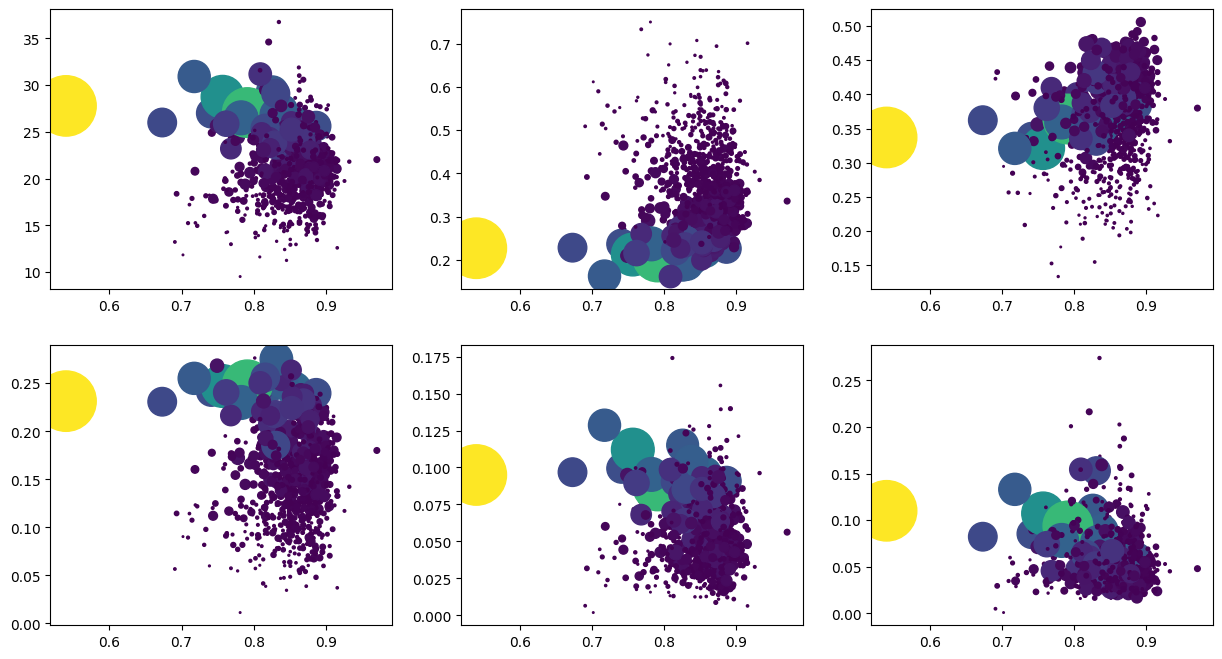

In [19]:
# 2009 graphs
df_2009 = df_2009.dropna(subset=['09_average_commute_time_per_worker_drive_alone'])

x_09 = df_2009['09_vehicles_per_worker']
y_09_1 = df_2009['09_average_commute_time_per_worker_drive_alone']
y_09_2 = df_2009['09_pct_car_wrkr_cmute_01_to_14_min']
y_09_3 = df_2009['09_pct_car_wrkr_cmute_15_to_29_min']
y_09_4 = df_2009['09_pct_car_wrkr_cmute_30_to_44_min']
y_09_5 = df_2009['09_pct_car_wrkr_cmute_44_to_59_min']
y_09_6 = df_2009['09_pct_car_wrkr_cmute_over_60_min']
c_09 = df_2009['09_total_population']

# plt.scatter(x, y1, c=c,s = c/10000, label='Raw data')
# plt.show()

fig=plt.figure(figsize=(15,8))
columns = 3
rows = 2

a=np.random.rand(2,3)
# for i in range(1, 6):
#     fig.add_subplot(rows, columns, i)
#     plt.scatter(x, y1, c=c,s = c/10000, label='Raw data')
fig.add_subplot(rows, columns, 1)
plt.scatter(x_09, y_09_1, c=c_09,s = c_09/10000, label='Raw data')
fig.add_subplot(rows, columns, 2)
plt.scatter(x_09, y_09_2, c=c_09,s = c_09/10000, label='Raw data')
fig.add_subplot(rows, columns, 3)
plt.scatter(x_09, y_09_3, c=c_09,s = c_09/10000, label='Raw data')
fig.add_subplot(rows, columns, 4)
plt.scatter(x_09, y_09_4, c=c_09,s = c_09/10000, label='Raw data')
fig.add_subplot(rows, columns, 5)
plt.scatter(x_09, y_09_5, c=c_09,s = c_09/10000, label='Raw data')
fig.add_subplot(rows, columns, 6)
plt.scatter(x_09, y_09_6, c=c_09,s = c_09/10000, label='Raw data')

plt.show()

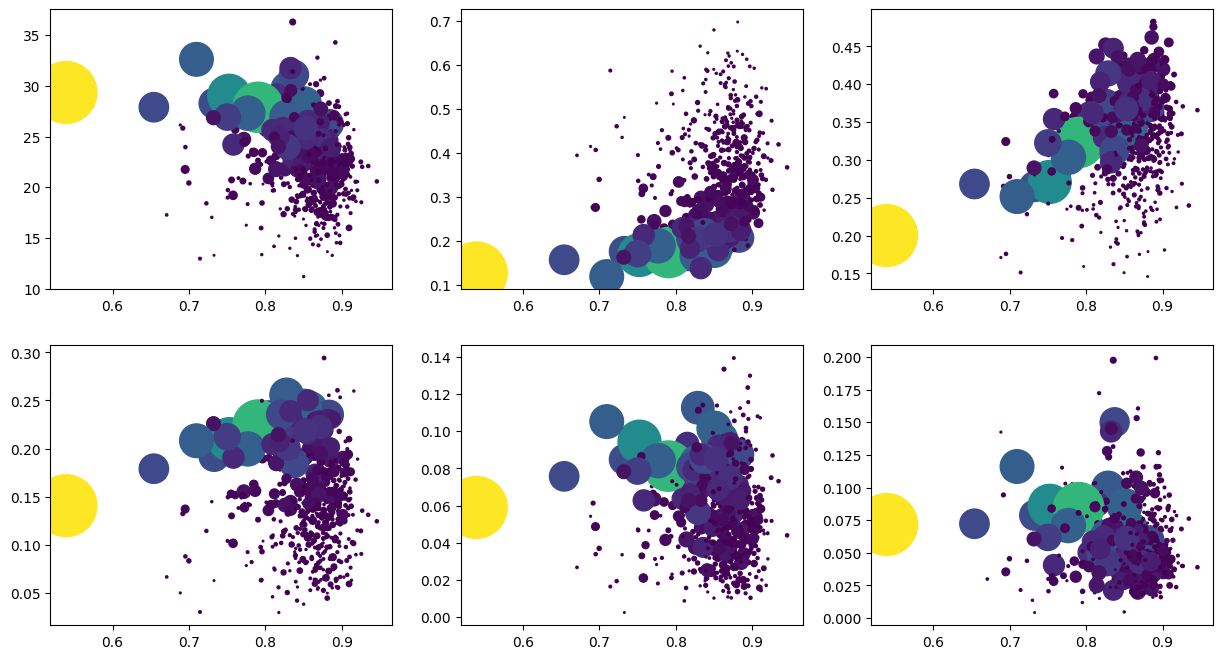

In [20]:
# 2014 graphs
df_2014 = df_2014.dropna(subset=['14_average_commute_time_per_worker_drive_alone'])

x_14 = df_2014['14_vehicles_per_worker']
y_14_1 = df_2014['14_average_commute_time_per_worker_drive_alone']
y_14_2 = df_2014['14_pct_car_wrkr_cmute_01_to_14_min']
y_14_3 = df_2014['14_pct_car_wrkr_cmute_15_to_29_min']
y_14_4 = df_2014['14_pct_car_wrkr_cmute_30_to_44_min']
y_14_5 = df_2014['14_pct_car_wrkr_cmute_44_to_59_min']
y_14_6 = df_2014['14_pct_car_wrkr_cmute_over_60_min']
c_14 = df_2014['14_total_population']

# plt.scatter(x, y1, c=c,s = c/10000, label='Raw data')
# plt.show()

fig=plt.figure(figsize=(15,8))
columns = 3
rows = 2

a=np.random.rand(2,3)
# for i in range(1, 6):
#     fig.add_subplot(rows, columns, i)
#     plt.scatter(x, y1, c=c,s = c/10000, label='Raw data')
fig.add_subplot(rows, columns, 1)
plt.scatter(x_14, y_14_1, c=c_14,s = c_14/10000, label='Raw data')
fig.add_subplot(rows, columns, 2)
plt.scatter(x_14, y_14_2, c=c_14,s = c_14/10000, label='Raw data')
fig.add_subplot(rows, columns, 3)
plt.scatter(x_14, y_14_3, c=c_14,s = c_14/10000, label='Raw data')
fig.add_subplot(rows, columns, 4)
plt.scatter(x_14, y_14_4, c=c_14,s = c_14/10000, label='Raw data')
fig.add_subplot(rows, columns, 5)
plt.scatter(x_14, y_14_5, c=c_14,s = c_14/10000, label='Raw data')
fig.add_subplot(rows, columns, 6)
plt.scatter(x_14, y_14_6, c=c_14,s = c_14/10000, label='Raw data')

plt.show()

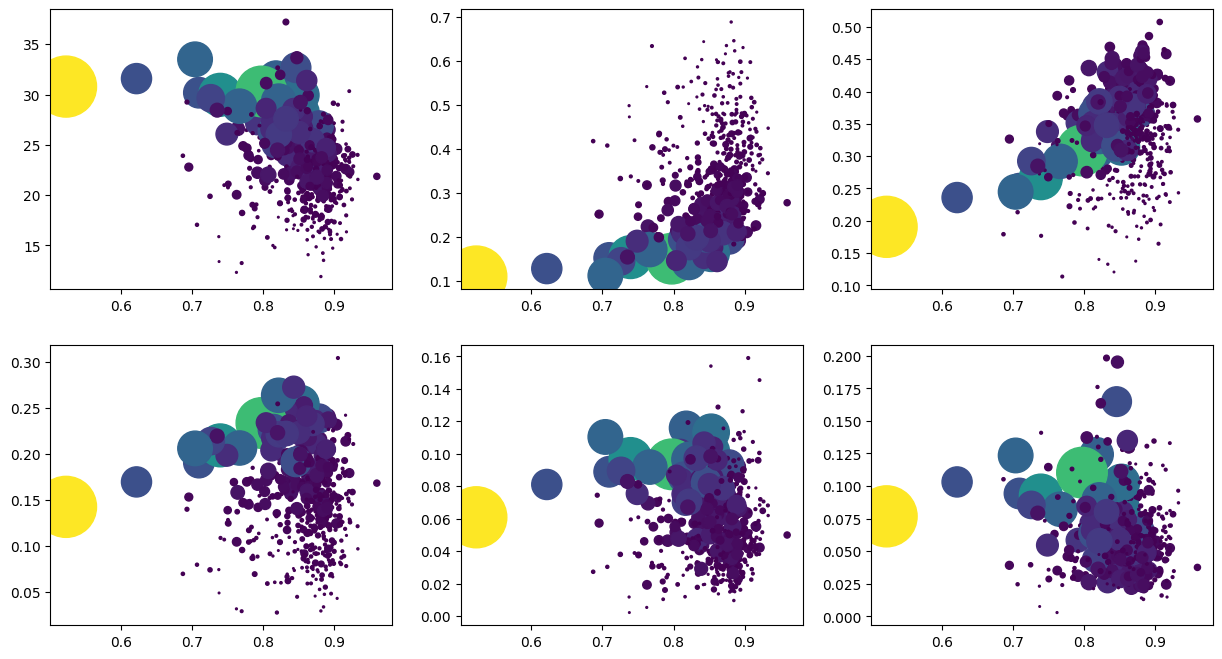

In [21]:
# 2014 graphs
df_2019 = df_2019.dropna(subset=['19_average_commute_time_per_worker_drive_alone'])

x_19 = df_2019['19_vehicles_per_worker']
y_19_1 = df_2019['19_average_commute_time_per_worker_drive_alone']
y_19_2 = df_2019['19_pct_car_wrkr_cmute_01_to_19_min']
y_19_3 = df_2019['19_pct_car_wrkr_cmute_15_to_29_min']
y_19_4 = df_2019['19_pct_car_wrkr_cmute_30_to_44_min']
y_19_5 = df_2019['19_pct_car_wrkr_cmute_44_to_59_min']
y_19_6 = df_2019['19_pct_car_wrkr_cmute_over_60_min']
c_19 = df_2019['19_total_population']

# plt.scatter(x, y1, c=c,s = c/10000, label='Raw data')
# plt.show()

fig=plt.figure(figsize=(15,8))
columns = 3
rows = 2

a=np.random.rand(2,3)
# for i in range(1, 6):
#     fig.add_subplot(rows, columns, i)
#     plt.scatter(x, y1, c=c,s = c/10000, label='Raw data')
fig.add_subplot(rows, columns, 1)
plt.scatter(x_19, y_19_1, c=c_19,s = c_19/10000, label='Raw data')
fig.add_subplot(rows, columns, 2)
plt.scatter(x_19, y_19_2, c=c_19,s = c_19/10000, label='Raw data')
fig.add_subplot(rows, columns, 3)
plt.scatter(x_19, y_19_3, c=c_19,s = c_19/10000, label='Raw data')
fig.add_subplot(rows, columns, 4)
plt.scatter(x_19, y_19_4, c=c_19,s = c_19/10000, label='Raw data')
fig.add_subplot(rows, columns, 5)
plt.scatter(x_19, y_19_5, c=c_19,s = c_19/10000, label='Raw data')
fig.add_subplot(rows, columns, 6)
plt.scatter(x_19, y_19_6, c=c_19,s = c_19/10000, label='Raw data')

plt.show()

In [22]:
# # select only 2 attributes and 1 target
# # for 3d plot

# drop_cols = ['19_vehicles_per_worker', '19_average_commute_time_per_worker_drive_alone', '19_total_population']
# df = df_2019.drop(columns = drop_cols, axis = 1)
# df.head()

df19 = df_2019[['19_vehicles_per_worker', '19_average_commute_time_per_worker_drive_alone', '19_total_population']]
df19 = df19.dropna(subset=['19_vehicles_per_worker', '19_average_commute_time_per_worker_drive_alone', '19_total_population'])



df14 = df_2014[['14_vehicles_per_worker', '14_average_commute_time_per_worker_drive_alone', '14_total_population']]
df14 = df14.dropna(subset=['14_vehicles_per_worker', '14_average_commute_time_per_worker_drive_alone', '14_total_population'])

In [23]:
df19['19_vehicles_per_worker']
df14['14_vehicles_per_worker']

0      0.869308
1      0.818721
2      0.882696
4      0.871844
6      0.878619
         ...   
922    0.868113
923    0.890009
924    0.901009
925    0.829547
927    0.908811
Name: 14_vehicles_per_worker, Length: 497, dtype: float64

C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\920597527.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\920597527.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\920597527.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\920597527.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_16712\920597527.py:72: UserWarning: Matplotlib is currently using module

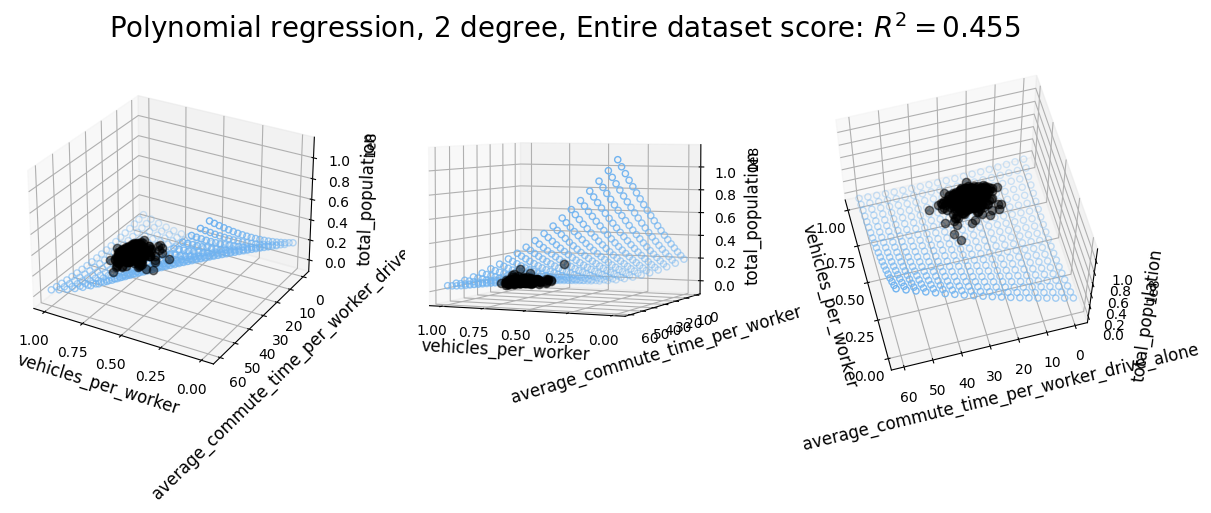

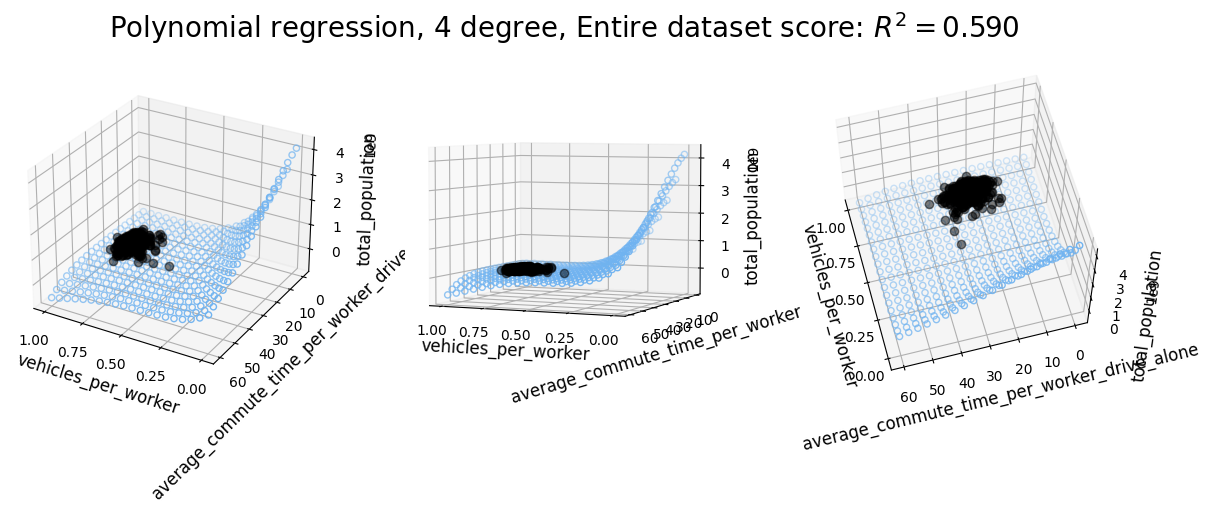

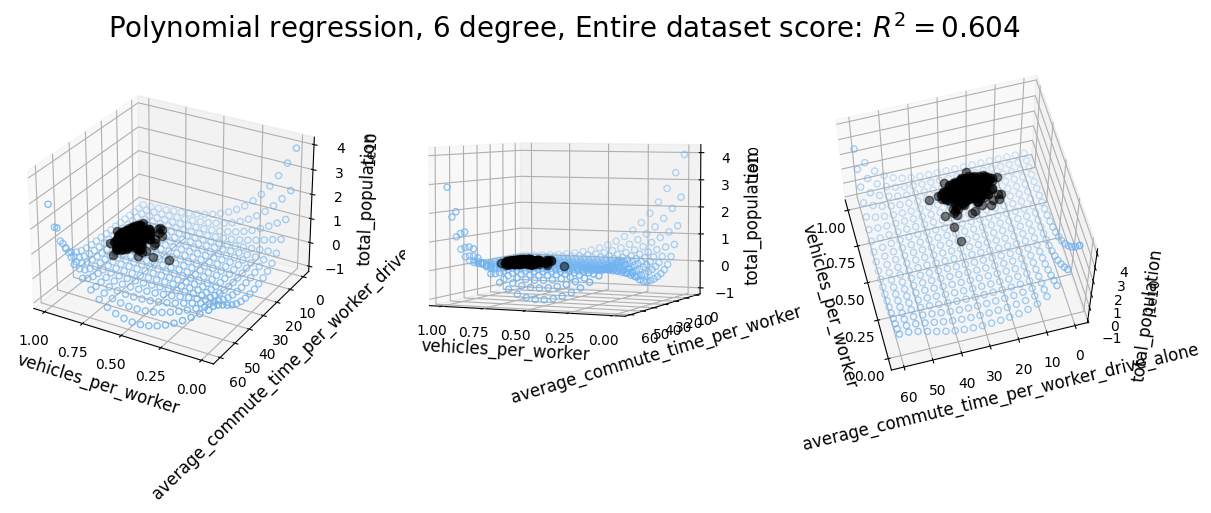

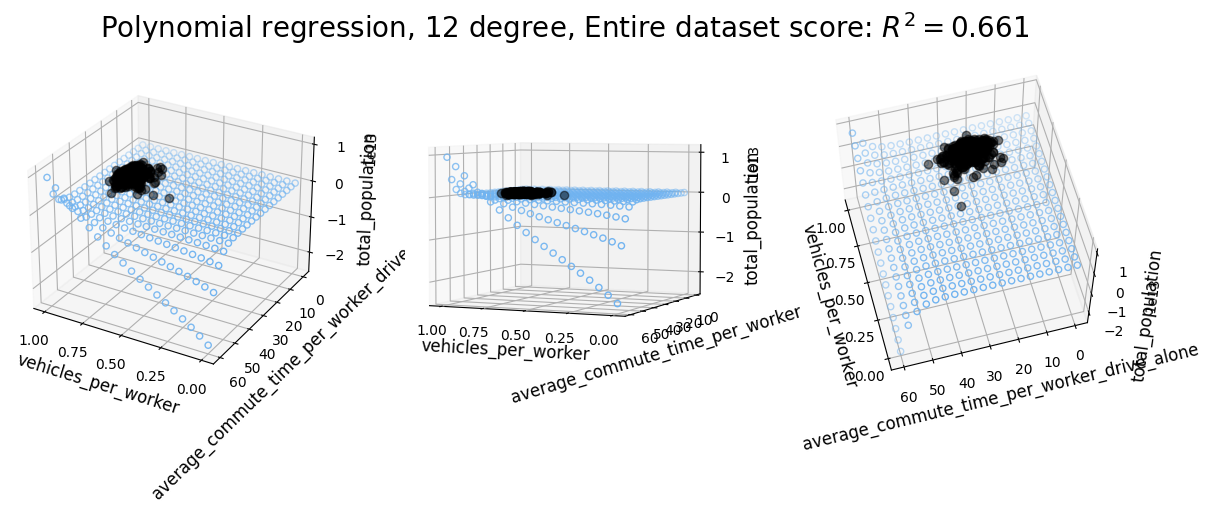

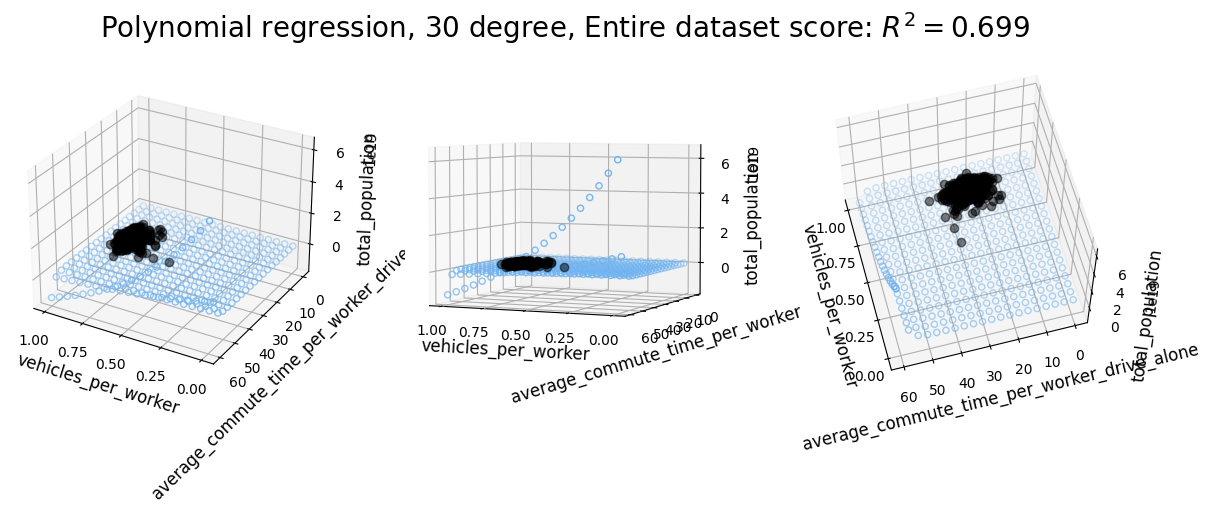

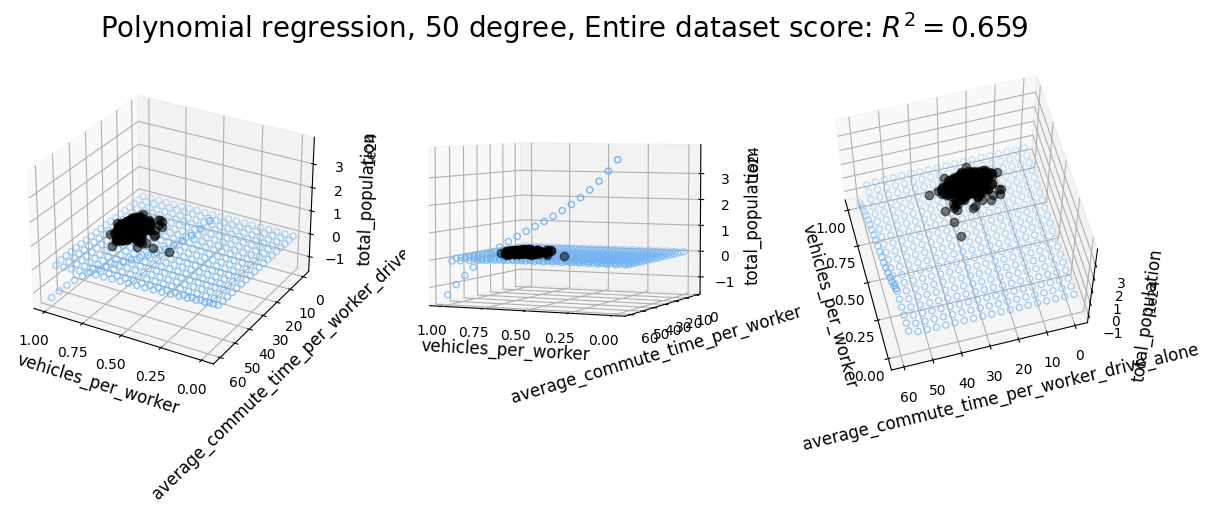

In [24]:
# 3d plot
# https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df19[['19_vehicles_per_worker', '19_average_commute_time_per_worker_drive_alone']].values.reshape(-1,2)
Y = df19['19_total_population']

# X = df14[['14_vehicles_per_worker', '14_average_commute_time_per_worker_drive_alone']].values.reshape(-1,2)
# Y = df14['14_total_population']

######################## Prepare model data point for visualization ###############################

# x = df['19_vehicles_per_worker']
# y = df['19_average_commute_time_per_worker_drive_alone']
# z = df['19_total_population']
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 1, 20)
# x_pred = np.linspace(0, 215245, 20)
y_pred = np.linspace(0, 60, 20)
# y_pred = np.linspace(0, 5642, 20)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
################################################ Train #############################################
for n_poly in [2,4,6,12,30,50]:
    poly = PolynomialFeatures(degree = n_poly) 
    X_poly = poly.fit_transform(X)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, Y)

    predicted = lr_poly.predict(poly.fit_transform(model_viz))

    ############################################## Evaluate ############################################

    r2 = lr_poly.score(poly.fit_transform(X), Y)

    ############################################## Plot ################################################

    plt.style.use('default')

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:
        ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
        ax.set_xlabel('vehicles_per_worker', fontsize=12)
        ax.set_ylabel('average_commute_time_per_worker_drive_alone', fontsize=12)
        ax.set_zlabel('total_population', fontsize=12)
        ax.locator_params(nbins=4, axis='x')
        ax.locator_params(nbins=5, axis='x')

    ax1.view_init(elev=28, azim=120)
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)

    fig.suptitle('Polynomial regression, %s degree, Entire dataset score: $R^2 = %.3f$' % (n_poly, r2), fontsize=20)

    fig.tight_layout()
    fig.show()